# 課題 Car Fuel Consumption
ガソリンの消費量を予測する

## フィードバックを受けてDay1の修正
①　import文を先頭にまとめて書く  
②　temp_insideを可視化して欠損値を判断する  
③　相関係数が高い説明変数を削除する  
④　異常値の確認

## Day1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 1. データセットの確認、前処理

In [2]:
df_rawdata = pd.read_csv('../通し課題/archive/measurements.csv')
display(df_rawdata)
df_rawdata.info()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [3]:
# distance, consume, temp_insideの型をfloatに変更
df_rawdata['distance']=df_rawdata['distance'].str.replace(',','.').astype(float)
df_rawdata['consume']=df_rawdata['consume'].str.replace(',','.').astype(float)
df_rawdata['temp_inside']=df_rawdata['temp_inside'].str.replace(',','.').astype(float)

display(df_rawdata)
df_rawdata.info()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [4]:
# specials, refill liters, refill gasは他の変数と情報が重複しているため削除
df_data=df_rawdata.drop(['specials','refill liters','refill gas'],axis=1)
display(df_data)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [5]:
# gas_typeはE10 = 0, SP98 = 1としてダミー変数に変更
lr=LabelEncoder()
df_data['gas_type']=lr.fit_transform(df_data['gas_type'])
display(df_data)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0
384,16.1,4.3,38,25.0,31,1,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0,0
386,15.4,4.6,42,25.0,31,1,1,0,0


In [6]:
#欠損値の確認
df_data.isnull().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

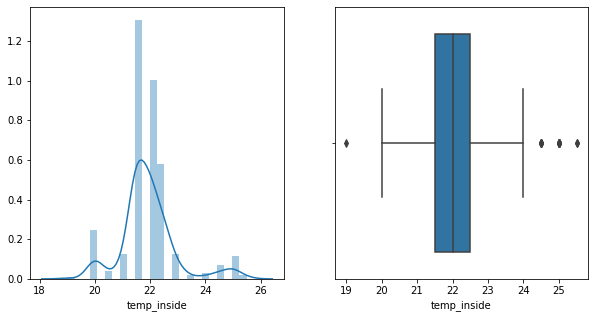

In [7]:
# temp_insideの欠損値の補完方法を考えるため可視化
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df_data['temp_inside'].dropna(), ax=ax[0])
sns.boxplot(df_data['temp_inside'].dropna(), ax=ax[1])

In [8]:
# 大きなばらつきは無く20~24℃の範囲で概ね収まっているので、欠損値を平均値で補完
df_data['temp_inside'].fillna(df_data['temp_inside'].mean(), inplace=True)

#欠損値の確認
df_data.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

### 2. 可視化

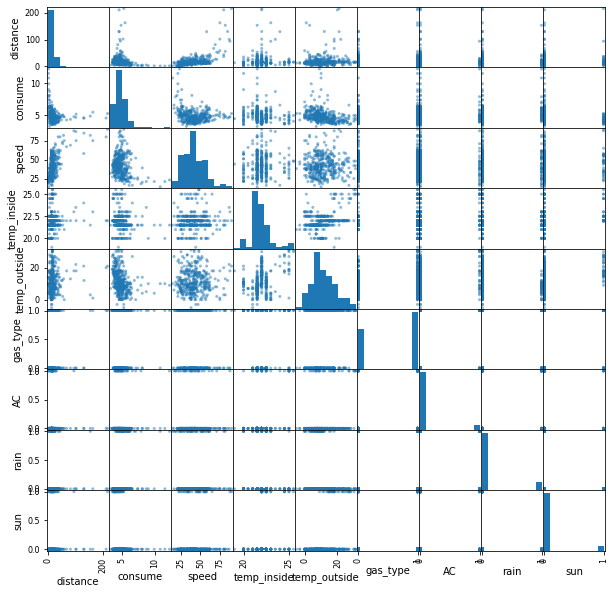

In [9]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_data, figsize=(10,10))
plt.show()

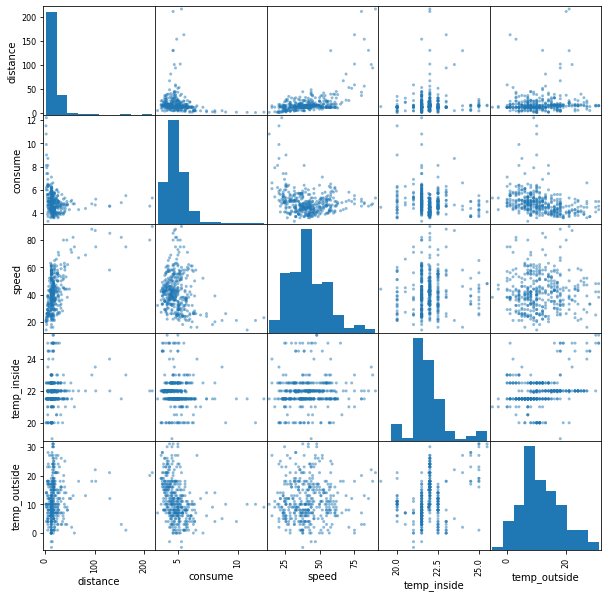

In [10]:
# ダミー変数（gas_type, AC, rain, sun）は除いて散布図行列を書く
pd.plotting.scatter_matrix(df_data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']], figsize=(10,10))
plt.show()

In [11]:
# 相関係数を確認
df_data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']].corr()

,distance,consume,speed,temp_inside,temp_outside
distance,1.000000,-0.128967,0.562299,0.075178,0.088175
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811
speed,0.562299,-0.227866,1.000000,0.059293,0.015411
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000


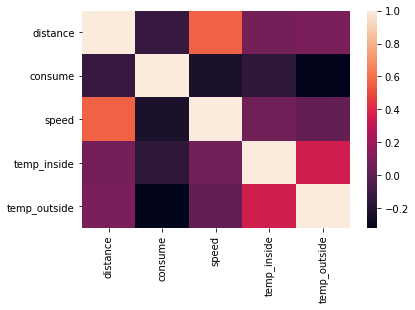

In [12]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']].corr())
plt.show()

distanceとspeedに正の相関が見られる。Day2で無相関化できるがここでは多重共線性を防ぐため、consumeと関係が小さそうなspeedを説明変数から除く。

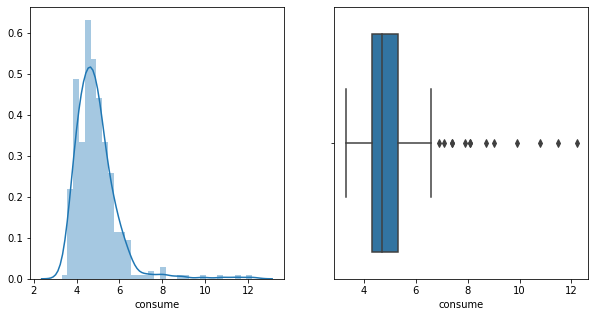

In [13]:
# 散布図を見ると目的変数であるconsumeのデータに異常値が含まれているので可視化
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df_data['consume'], ax=ax[0])
sns.boxplot(df_data['consume'], ax=ax[1])

In [14]:
# 箱ひげ図からおよそ7以上のデータは異常値となっている。consumeが7未満と7以上のデータについて他の変数に有意な差が無いか確認
df_data[df_data['consume'] < 7].describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,20.161170,4.781649,42.454787,21.940570,11.468085,0.587766,0.071809,0.117021,0.085106
std,22.839185,0.679536,13.368144,0.994628,7.038109,0.492893,0.258515,0.321874,0.279412
min,2.000000,3.300000,16.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,11.875000,4.300000,33.000000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,15.400000,4.700000,41.000000,22.000000,10.000000,1.000000,0.000000,0.000000,0.000000
75%,19.650000,5.200000,50.000000,22.500000,16.000000,1.000000,0.000000,0.000000,0.000000
max,216.100000,6.900000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_data[df_data['consume'] >= 7].describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,3.725000,9.008333,25.416667,21.583333,7.916667,0.583333,0.250000,0.333333,0.0
std,3.020874,1.710640,10.326122,0.973124,4.209477,0.514929,0.452267,0.492366,0.0
min,1.300000,7.100000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,7.775000,20.750000,21.500000,4.750000,0.000000,0.000000,0.000000,0.0
50%,2.650000,8.400000,22.000000,21.500000,9.000000,1.000000,0.000000,0.000000,0.0
75%,4.950000,10.125000,26.000000,21.750000,10.000000,1.000000,0.250000,1.000000,0.0
max,12.300000,12.200000,52.000000,23.500000,14.000000,1.000000,1.000000,1.000000,0.0


consumeが7未満と7以上のデータを比べると、7以上のデータはdistanceが極端に小さい。一般的には走行距離が長いほど燃料消費量も多くなるため、通常の走行とは異なるデータであると考えられる。  
例えば渋滞時や駐車時など停止時間が長いデータである可能性が考えられる。説明変数に停止時間等のデータがあればこれらのデータも上手く予測できると考えられるが、手持ちのデータには含まれないため異常値として削除する。

In [16]:
#consumeが7以上のデータを異常値として削除
df_data = df_data[df_data['consume'] < 7]

### 3. 機械学習モデルの構築

目的変数：consume  
説明変数：distance, temp_inside, temp_outside, gas_type, AC, rain, sun

#### 3-1. 線形回帰モデル

In [17]:
# 係数を求める
y = df_data["consume"].values
X = df_data[['distance', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]
w6 = regr.coef_[5]
w7 = regr.coef_[6]

In [18]:
x1 = df_data['distance'].values
x2 = df_data['temp_inside'].values
x3 = df_data['temp_outside'].values
x4 = df_data['gas_type'].values
x5 = df_data['AC'].values
x6 = df_data['rain'].values
x7 = df_data['sun'].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6 + w7 * x7
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}, w7 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6, w7))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 5.507, w1 = -0.001, w2 = -0.015, w3 = -0.035, w4 = -0.021, w5 = 0.205, w6 = 0.333, w7 = -0.151
二乗誤差 = 68.553


### 4. モデルの評価

In [19]:
# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.365
MAE = 0.48
RMSE = 0.604


Day1提出時と修正後の予測誤差は以下の通り。  
Day1提出時：MSE = 0.845, MAE = 0.618, RMSE = 0.919  
Day1修正後：MSE = 0.365, MAE = 0.480, RMSE = 0.604

修正後の方が予測精度が向上していることが分かる。
Day2以降でさらなる精度向上を目指す。

## Day2（修正なし）

実施内容  
① 標準化によりデータのスケールを揃える  
② 無相関化により多重共線性を防ぐ  
③ 交差検証法によりモデルの汎化性能を確認する  
④ 過学習しているか確認し、正則化を取り入れるか検討する   
⑤ グリッドサーチによりハイパーパラメータの探索を行う

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNet 

### 1. データ前処理

In [21]:
# データを無相関化
# Day1で相関が見られたdistanceとspeedを無相関化する
data_distance_speed = df_data[['distance', 'speed']]
cov = np.cov(data_distance_speed, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
data_decorr = np.dot(S.T, data_distance_speed.T).T #データを無相関化

相関係数: -0.000


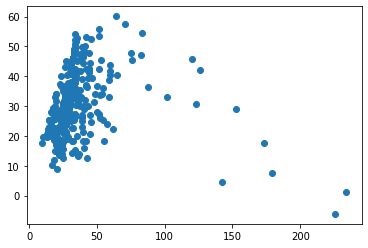

In [22]:
# 無相関化されたか確認
print('相関係数: {:.3f}'.format(np.corrcoef(data_decorr[:, 0], data_decorr[:, 1])[0,1]))
plt.plot(data_decorr[:, 0], data_decorr[:, 1], 'o')
plt.show()

In [23]:
# 無相関化したデータを新しく変数として追加
df_data['distance_decorr'] = data_decorr[:, 0]
df_data['speed_decorr'] = data_decorr[:, 1]
df_data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,distance_decorr,speed_decorr
0,28.0,5.0,26,21.5,12,0,0,0,0,35.777696,13.414786
1,12.0,4.2,30,21.5,13,0,0,0,0,22.496508,23.192825
2,11.2,5.5,38,21.5,15,0,0,0,0,24.795413,30.897047
3,12.9,3.9,36,21.5,14,0,0,0,0,25.608248,28.401191
4,18.5,4.5,46,21.5,15,0,0,0,0,34.587150,35.524345
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0,29.615477,29.998725
384,16.1,4.3,38,25.0,31,1,1,0,0,29.328114,29.035698
385,16.0,3.8,45,25.0,19,1,0,0,0,31.894680,35.548972
386,15.4,4.6,42,25.0,31,1,1,0,0,30.200054,33.001769


### 2. 交差検証法による汎化性能の確認

まずはDay1と同じ線形回帰モデルで汎化性能を確認する。  
目的変数：consume  
説明変数：distance_decorr, speed_decorr, temp_inside, temp_outside, gas_type, AC, rain, sun

また説明変数は学習の前に標準化を行う。

In [24]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

n_split = 10

cross_valid_mse = 0
cross_valid_mae = 0
cross_valid_rmse = 0

for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # 標準化
    stdsc = StandardScaler()
    X_train_stand = stdsc.fit_transform(X_train)
    X_test_stand = stdsc.transform(X_test)
    
    # モデルの学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train_stand, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test_stand)
    
    # テストデータに対する予測誤差を計算
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    
    cross_valid_mse += mse
    cross_valid_mae += mae
    cross_valid_rmse += rmse

# 最終的な汎化誤差を出力する
final_mse = cross_valid_mse / n_split
final_mae = cross_valid_mae / n_split
final_rmse = cross_valid_rmse / n_split
print("Cross Validation MSE = %s"%round(final_mse, 3))
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Validation RMSE = %s"%round(final_rmse, 3))

Cross Validation MSE = 0.383
Cross Validation MAE = 0.492
Cross Validation RMSE = 0.617


Day1での誤差とほとんど変化していない。
（Day1修正後：MSE = 0.365, MAE = 0.480, RMSE = 0.604）

### 3. ホールドアウト法による過学習の確認

In [25]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

# 学習用データを使って線形回帰モデルを学習
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_stand, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train_stand)

# 学習データに対するMAEを計算（訓練誤差の評価）
mae = mean_absolute_error(y_train, y_pred_train)
print("訓練誤差　MAE = %s"%round(mae,3) )

# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test_stand)

# テストデータに対するMAEを計算（汎化誤差の評価）
mae = mean_absolute_error(y_test, y_pred_test)
print("汎化誤差　MAE = %s"%round(mae,3) )

訓練誤差　MAE = 0.491
汎化誤差　MAE = 0.428


訓練誤差と汎化誤差に差がないので過学習は起きていないと考えられる。
そのため今回は正則化は不要であるが、練習のためRidgeとLassoを適用する。

### 4.  正則化

#### 4-1. Ridge

In [26]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

#グリッドサーチによりハイパーパラメータを探索する
alpha_param = np.logspace(-3, 3, 7)
parameters = {'alpha':alpha_param}
model = Ridge()
ridge = GridSearchCV(model, parameters, cv=3)
ridge.fit(X_train_stand, y_train)
print(ridge.best_params_)

# 最適パラメータを用いてテストデータを予測する
ridge2 = Ridge(**ridge.best_params_)
ridge2.fit(X_train_stand, y_train)
y_pred_test = ridge2.predict(X_test_stand)
mae = mean_absolute_error(y_test, y_pred_test)
print("汎化誤差　MAE = %s"%round(mae,3) )

{'alpha': 100.0}
汎化誤差　MAE = 0.42


#### 4-2. Lasso

In [27]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

#グリッドサーチによりハイパーパラメータを探索する
alpha_param = np.logspace(-3, 3, 7)
parameters = {'alpha':alpha_param}
model = Lasso()
lasso = GridSearchCV(model, parameters, cv=3)
lasso.fit(X_train_stand, y_train)
print(lasso.best_params_)

# 最適パラメータを用いてテストデータを予測する
lasso2 = Lasso(**lasso.best_params_)
lasso2.fit(X_train_stand, y_train)
y_pred_test = lasso2.predict(X_test_stand)
mae = mean_absolute_error(y_test, y_pred_test)
print("汎化誤差　MAE = %s"%round(mae,3) )

{'alpha': 0.01}
汎化誤差　MAE = 0.423


RidgeでもLassoでも正則化なしのモデルと汎化誤差は同程度であり、今回は過学習を起こしていないため正則化の効果は低いことが分かった。  
Day3以降では線形回帰以外のモデルを構築して精度向上を目指す。

## Day3（修正なし）

実施内容  
①　ラッパー法や埋め込み法により特徴選択を事前に行って線形回帰モデルを構築する  
②　木モデルを用いて回帰予測する  
③　ニューラルネットワークを用いて回帰予測する

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


### 1. 特徴選択を事前に行った線形回帰モデル

Day1でフィルタ法により、distanceと相関係数の高いspeedを説明変数から除外したモデルを構築した。  
今回はラッパー法と埋め込み法による特徴選択を行う。

#### 1-1. ラッパー法

Day2で無相関化した以下の説明変数からステップワイズ法により特徴選択を行う。  
説明変数：distance_decorr, speed_decorr, temp_inside, temp_outside, gas_type, AC, rain, sun

In [29]:
# estimatorにモデルをセット
# 今回は回帰問題であるためLinearRegressionを使用
estimator = LinearRegression(normalize=False)

# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_absolute_errorを評価指標に指定
rfecv = RFECV(estimator, cv=10, scoring='neg_mean_absolute_error')

In [30]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

# fitで特徴選択を実行
rfecv.fit(X, y)

RFECV(cv=10, estimator=LinearRegression(), scoring='neg_mean_absolute_error')

Feature ranking: 
[3 2 1 1 1 1 1 1]


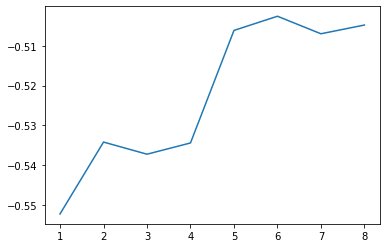

In [31]:
# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rfecv.ranking_))

# 特徴数とスコアの変化をプロット
# 負のMAEが評価基準になっており，値がゼロに近いほど汎化誤差は小さい
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [32]:
# 削除してもよい特徴の名前を取得する
remove_idx = ~rfecv.support_
remove_feature = df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].columns[remove_idx]
remove_feature

Index(['distance_decorr', 'speed_decorr'], dtype='object')

重要度が低い'distance_decorr', 'speed_decorr'を説明変数から除外して線形回帰モデルを構築し、交差検証法で汎化性能を調べる  
目的変数：consume  
説明変数：temp_inside, temp_outside, gas_type, AC, rain, sun

In [33]:
y = df_data["consume"].values
X = df_data[['temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

n_split = 10

cross_valid_mse = 0
cross_valid_mae = 0
cross_valid_rmse = 0

for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # 標準化
    stdsc = StandardScaler()
    X_train_stand = stdsc.fit_transform(X_train)
    X_test_stand = stdsc.transform(X_test)
    
    # モデルの学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train_stand, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test_stand)
    
    # テストデータに対する予測誤差を計算
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    
    cross_valid_mse += mse
    cross_valid_mae += mae
    cross_valid_rmse += rmse

# 最終的な汎化誤差を出力する
final_mse = cross_valid_mse / n_split
final_mae = cross_valid_mae / n_split
final_rmse = cross_valid_rmse / n_split
print("Cross Validation MSE = %s"%round(final_mse, 3))
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Validation RMSE = %s"%round(final_rmse, 3))

Cross Validation MSE = 0.383
Cross Validation MAE = 0.491
Cross Validation RMSE = 0.616


'distance_decorr', 'speed_decorr'を除く前の汎化性能と同程度の結果が得られた。このことから、特徴選択により説明変数を減らすことで汎化性能は下げずに計算時間を減らすことができることが分かった。

（'distance_decorr', 'speed_decorr'を除く前の汎化性能）  
Cross Validation MSE = 0.383 　　
Cross Validation MAE = 0.492　　
Cross Validation RMSE = 0.617

#### 1-2. 埋め込み法

Day2で無相関化した以下の説明変数からL1正則化により特徴選択を行う。  
説明変数：distance_decorr, speed_decorr, temp_inside, temp_outside, gas_type, AC, rain, sun

In [34]:
# estimatorにモデルをセット
# LassoCVを使って、正則化の強さは自動決定
estimator = LassoCV(normalize=True, cv=10)

# モデルの情報を使って特徴選択を行う場合は、SelectFromModelを使う
# 今回は係数が1e-5以下である特徴を削除する
sfm = SelectFromModel(estimator, threshold=1e-5)

In [35]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

# fitで特徴選択を実行
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(cv=10, normalize=True), threshold=1e-05)

In [36]:
# 削除してもよい特徴の名前を取得する
remove_idx2 = ~sfm.get_support()
remove_feature2 = df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].columns[remove_idx2]
remove_feature2

Index(['distance_decorr', 'temp_inside', 'gas_type'], dtype='object')

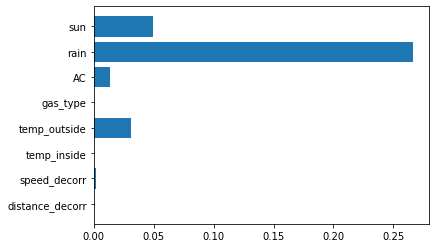

In [37]:
# LASSOで得た各特徴の係数の値を確認
abs_coef = np.abs(sfm.estimator_.coef_)
plt.barh(np.arange(0, len(abs_coef)), abs_coef, \
         tick_label=df_data[['distance_decorr', 'speed_decorr', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].columns.values)
plt.show()

重要度が低い'distance_decorr', 'temp_inside', 'gas_type'を説明変数から除外して線形回帰モデルを構築し、交差検証法で汎化性能を調べる  
目的変数：consume  
説明変数：speed_decorr, temp_outside, AC, rain, sun

In [38]:
y = df_data["consume"].values
X = df_data[['speed_decorr', 'temp_outside', 'AC', 'rain', 'sun']].values

n_split = 10

cross_valid_mse = 0
cross_valid_mae = 0
cross_valid_rmse = 0

for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # 標準化
    stdsc = StandardScaler()
    X_train_stand = stdsc.fit_transform(X_train)
    X_test_stand = stdsc.transform(X_test)
    
    # モデルの学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train_stand, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test_stand)
    
    # テストデータに対する予測誤差を計算
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    
    cross_valid_mse += mse
    cross_valid_mae += mae
    cross_valid_rmse += rmse

# 最終的な汎化誤差を出力する
final_mse = cross_valid_mse / n_split
final_mae = cross_valid_mae / n_split
final_rmse = cross_valid_rmse / n_split
print("Cross Validation MSE = %s"%round(final_mse, 3))
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Validation RMSE = %s"%round(final_rmse, 3))

Cross Validation MSE = 0.377
Cross Validation MAE = 0.486
Cross Validation RMSE = 0.611


埋め込み法による特徴選択を行うことで、ラッパー法と比較して少し汎化性能が向上した。

### 2. 決定木モデルによる予測

・　ランダムフォレストとアダブーストを用いて予測を行う。  
・　決定木モデルはハイパーパラメータの数が多く、グリッドサーチでは計算時間が長くなると考えられるため、ランダムサーチによる探索を行う。  
・　決定木モデルは事前にデータのスケーリングが不要なので標準化は行わない。  
・　多重共線性は考えなくて良いので、説明変数は以下を用いる。  
   説明変数：distance, speed, temp_inside, temp_outside, gas_type, AC, rain, sun

#### 2-1. ランダムフォレスト

In [39]:
y = df_data["consume"].values
X = df_data[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# ランダムサーチ用のパラメータ設定
paramR = {'n_estimators':np.arange(200), 'max_depth':[i for i in range(3, 100)],\
          'min_samples_split':[i for i in range(2, 10)],  'min_samples_leaf':[i for i in range(2, 10)]}

#  ランダムサーチの実行
model = RandomForestRegressor()
RFR_rand = RandomizedSearchCV(model, paramR, cv=3, random_state=1234)
RFR_rand.fit(X_train, y_train)
print(RFR_rand.best_params_)

# テストデータに対する予測を実行
y_pred_test = RFR_rand.predict(X_test)
    
# テストデータに対する予測誤差を計算
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("MSE = %s"%round(mse, 3))
print("MAE = %s"%round(mae, 3))
print("RMSE = %s"%round(rmse, 3))

{'n_estimators': 127, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 47}
MSE = 0.243
MAE = 0.371
RMSE = 0.493


#### 2-2. アダブースト

In [40]:
y = df_data["consume"].values
X = df_data[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# ランダムサーチ用のパラメータ設定
paramR = {'max_depth':[i for i in range(3, 100)],\
          'min_samples_split':[i for i in range(2, 10)],  'min_samples_leaf':[i for i in range(2, 10)]}

#  ランダムサーチの実行
model = DecisionTreeRegressor()
DTR_rand = RandomizedSearchCV(model, paramR, cv=3, random_state=1234)
ada=AdaBoostRegressor(DTR_rand, n_estimators=100, random_state=1234)
ada.fit(X_train, y_train)

# テストデータに対する予測を実行
y_pred_test = ada.predict(X_test)
    
# テストデータに対する予測誤差を計算
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("MSE = %s"%round(mse, 3))
print("MAE = %s"%round(mae, 3))
print("RMSE = %s"%round(rmse, 3))

MSE = 0.278
MAE = 0.395
RMSE = 0.527


ランダムフォレスト、アダブースト共に線形回帰モデルと比較して汎化性能が向上した。

### 3. ニューラルネットワークによる予測

・　多重共線性は考えなくて良いので、説明変数は以下を用いる。  
  説明変数：distance, speed, temp_inside, temp_outside, gas_type, AC, rain, sun  
・　データのスケールの影響を受けるので標準化を行う。  
・　以下の条件のもと、ランダムサーチによりハイパーパラメータの探索を行う。  
　　中間層：１層、活性化関数はReluまたはSigmoid  
　　出力層：活性化関数は恒等関数

In [41]:
y = df_data["consume"].values
X = df_data[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

# モデルの作成
def NN_model(activation="relu", optimizer="sgd", out_dim=10):
    model = Sequential()
    model.add(Dense(out_dim, input_dim=8, activation=activation))
    model.add(Dense(out_dim, activation=activation))
    model.add(Dense(1, activation="linear"))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

# ランダムサーチ用のパラメータ設定
paramR = {'activation':["relu", "sigmoid"], 'optimizer':["sgd", "rmsprop", "adam", "adagrad", "adadelta"],\
          'out_dim':[i for i in range(10, 50)],  'nb_epoch':[i for i in range(10, 100)], 'batch_size':[i for i in range(10, 100)]}


In [42]:
#  ランダムサーチの実行
KR_model = KerasRegressor(build_fn=NN_model)
NN_rand = RandomizedSearchCV(KR_model, paramR, cv=3, random_state=1234)
NN_rand.fit(X_train_stand, y_train)
print(NN_rand.best_params_)

Train on 200 samples
200/200 [==============================] - 1s 4ms/sample - loss: 22.1612 - mae: 4.6187
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 1s 3ms/sample - loss: 21.2753 - mae: 4.3881
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 1s 4ms/sample - loss: 23.1110 - mae: 4.7341
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 1s 3ms/sample - loss: 25.7088 - mae: 5.0236
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 1s 3ms/sample - loss: 23.8134 - mae: 4.8291
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 1s 3ms/sample - loss: 22.7982 - mae: 4.6999
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 1s 3ms/sample - loss: 26.2814 - mae: 5.0800
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 1s 3ms/sample - loss: 25.7202 - mae: 5.0101
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 1s 4ms/sample - loss: 21.0937 - mae: 4.5263
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 200 samples
200/200 [==============================] - 0s 2ms/sample - loss: 17.5928 - mae: 4.0999
100/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 300 samples
300/300 [==============================] - 0s 2ms/sample - loss: 6.8675 - mae: 2.3006
{'out_dim': 45, 'optimizer': 'sgd', 'nb_epoch': 62, 'batch_size': 61, 'activation': 'sigmoid'}


Train on 300 samples, validate on 76 samples
Epoch 1/62
300/300 [==============================] - 1s 2ms/sample - loss: 11.6305 - mae: 3.0331 - val_loss: 1.5251 - val_mae: 1.0677
Epoch 2/62
300/300 [==============================] - 0s 265us/sample - loss: 0.8786 - mae: 0.7289 - val_loss: 0.4758 - val_mae: 0.5326
Epoch 3/62
300/300 [==============================] - 0s 248us/sample - loss: 0.5178 - mae: 0.5806 - val_loss: 0.4301 - val_mae: 0.4966
Epoch 4/62
300/300 [==============================] - 0s 253us/sample - loss: 0.5051 - mae: 0.5816 - val_loss: 0.4271 - val_mae: 0.4940
Epoch 5/62
300/300 [==============================] - 0s 270us/sample - loss: 0.5027 - mae: 0.5794 - val_loss: 0.4225 - val_mae: 0.4895
Epoch 6/62
300/300 [==============================] - 0s 274us/sample - loss: 0.5043 - mae: 0.5820 - val_loss: 0.4199 - val_mae: 0.4872
Epoch 7/62
300/300 [==============================] - 0s 287us/sample - loss: 0.5016 - mae: 0.5795 - val_loss: 0.4186 - val_mae: 0.4864
Epoc

300/300 [==============================] - 0s 225us/sample - loss: 0.4474 - mae: 0.5509 - val_loss: 0.3708 - val_mae: 0.4568
Epoch 61/62
300/300 [==============================] - 0s 236us/sample - loss: 0.4465 - mae: 0.5504 - val_loss: 0.3706 - val_mae: 0.4571
Epoch 62/62
300/300 [==============================] - 0s 240us/sample - loss: 0.4462 - mae: 0.5486 - val_loss: 0.3695 - val_mae: 0.4559


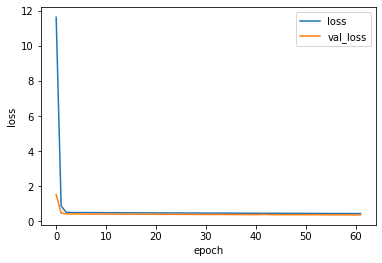

In [43]:
# 最良のパラメータでモデルを構築
model = Sequential()
model.add(Dense(45, input_dim=8, activation="sigmoid"))
model.add(Dense(45, activation="sigmoid"))
model.add(Dense(1, activation="linear"))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mae'])

# 計算の実行
fit = model.fit(X_train_stand, y_train, epochs=62, batch_size=61, validation_data=(X_test_stand, y_test))

# 各epochにおける損失をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

In [44]:
# テストデータに対する予測を実行
y_pred_test = model.predict(X_test_stand)
    
# テストデータに対する予測誤差を計算
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("MSE = %s"%round(mse, 3))
print("MAE = %s"%round(mae, 3))
print("RMSE = %s"%round(rmse, 3))

MSE = 0.369
MAE = 0.456
RMSE = 0.608


今回作成したニューラルネットモデルは線形回帰モデルよりは汎化性能は良くなったが、決定木モデルと比較すると汎化誤差が大きくなった。
グリッドサーチと比べてランダムサーチでは調べる組み合わせが少ない分、最適なハイパーパラメータの探索が難しいため汎化性能が向上しなかったと考えられる。
時間をかけてグリッドサーチを行うかベイズ最適化を適用すれば汎化性能がさらに向上する可能性はあると考えられる。

## Day4

実施内容  
①　k最近傍法を用いて回帰予測する  
②　主成分分析による特徴抽出を行い、ニューラルネットワークを用いて回帰予測する  
③　Day１〜４で検証したモデルの精度をまとめる

In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.decomposition import PCA
from bayes_opt import BayesianOptimization

### 1. k最近傍法による予測

・　多重共線性は考えなくて良いので、説明変数は以下を用いる。  
  説明変数：distance, speed, temp_inside, temp_outside, gas_type, AC, rain, sun  
・　データのスケールの影響を受けるので標準化を行う。  
・　n_neighborsを順次変えて試行し、ハイパーパラメータの探索を行う。

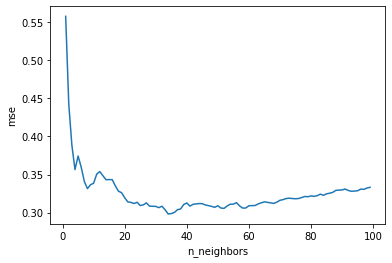

MSE = 0.298
n_neighbors =  33


In [46]:
y = df_data["consume"].values
X = df_data[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)


# n_neighborsを順次変えて予測誤差を計算 
mse_list = []
k_range = range(1, 100)
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_stand, y_train)
    y_pred = knn.predict(X_test_stand)
    mse_list.append(mean_squared_error(y_test, y_pred))

#  n_neighborsを変えた時の予測誤差を図示
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, mse_list)
ax.set_xlabel('n_neighbors')
ax.set_ylabel('mse')
plt.show()

#  最小の予測誤差とその時のn_neighborsを表示
mse = min(mse_list)
index = mse_list.index(min(mse_list))
print("MSE = %s"%round(mse, 3))
print("n_neighbors = ", index)


予測誤差の最小値はMSE=0.298となり、線形回帰モデルよりは精度が良くなったが、ランダムフォレストほどは良くなかった。
k最近傍法はシンプルなアルゴリズムであるため、複雑な関係性は捉えきれないためと考えられる。

### 2. 特徴抽出 

主成分分析により特徴抽出を行う。

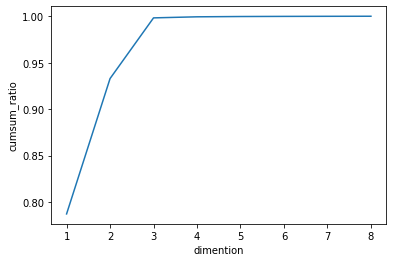

In [47]:
X = df_data[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

# 標準化
stdsc = StandardScaler()
X_stand = stdsc.fit_transform(X)

# PCAにより説明変数と同じ８次元に抽出
pca = PCA(n_components=8) 
pca.fit(X) 

# 累積の寄与率を計算
ratio_list = np.cumsum(pca.explained_variance_ratio_)

#  累積の寄与率を図示
plt.plot(range(1, 9), ratio_list)
plt.xlabel("dimention")
plt.ylabel("cumsum_ratio")
plt.show()

主成分分析の結果、３次元までで寄与率がほぼ1に達していることから、第３主成分までで説明変数の情報がほとんど含まれていることが分かった。

### 3. 次元削減とニューラルネットによる予測

#### 3-1. PCAとニューラルネット

・　前項の特徴抽出の結果から次元数を３に削減したのちに、ニューラルネットによる予測を行う。  
・　ニューラルネットは以下の条件のもと、ベイズ最適化によりハイパーパラメータの探索を行う。  
　　中間層：１層、活性化関数はRelu  
    出力層：活性化関数は恒等関数  
    最適化手法はAdam

In [48]:
y = df_data["consume"].values
X = df_data[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

#次元削減
pca = PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train_stand)
X_test_pca=pca.transform(X_test_stand)

# モデルの作成
def NN_model(activation="relu", optimizer="adam", out_dim=10, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(out_dim, input_dim=3, activation=activation))
    model.add(Dense(out_dim, activation=activation))
    model.add(Dense(1, activation="linear"))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    model.fit(X_train_pca, y_train, epochs=100, batch_size=20)
    pred = model.predict(X_test_pca)
    score = mean_squared_error(y_test, pred)
    return score

# 最適化するパラメータの下限・上限 
pbounds = {
    'out_dim': (10, 100),
    'learning_rate':(0.001, 1),
}

# 関数と最適化するパラメータを渡す
optimizer = BayesianOptimization(f=NN_model, pbounds=pbounds, verbose=0)

# 最適化
optimizer.maximize(init_points=5, n_iter=20, acq='ei')

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 2ms/sample - loss: 19.2245 - mse: 19.2245
Epoch 2/100
300/300 [==============================] - 0s 183us/sample - loss: 13.2368 - mse: 13.2368
Epoch 3/100
300/300 [==============================] - 0s 133us/sample - loss: 8.2896 - mse: 8.2896
Epoch 4/100
300/300 [==============================] - 0s 138us/sample - loss: 4.6783 - mse: 4.6783
Epoch 5/100
300/300 [==============================] - 0s 102us/sample - loss: 2.6304 - mse: 2.6304
Epoch 6/100
300/300 [==============================] - 0s 105us/sample - loss: 1.8297 - mse: 1.8297
Epoch 7/100
300/300 [==============================] - 0s 91us/sample - loss: 1.6441 - mse: 1.6441
Epoch 8/100
300/300 [==============================] - 0s 123us/sample - loss: 1.5020 - mse: 1.5020
Epoch 9/100
300/300 [==============================] - 0s 113us/sample - loss: 1.3777 - mse: 1.3777
Epoch 10/100
300/300 [==============================] - 0s 109us/sample - loss

300/300 [==============================] - 0s 136us/sample - loss: 0.2813 - mse: 0.2813
Epoch 82/100
300/300 [==============================] - 0s 138us/sample - loss: 0.2858 - mse: 0.2858
Epoch 83/100
300/300 [==============================] - 0s 104us/sample - loss: 0.2763 - mse: 0.2763
Epoch 84/100
300/300 [==============================] - 0s 117us/sample - loss: 0.2843 - mse: 0.2843
Epoch 85/100
300/300 [==============================] - 0s 99us/sample - loss: 0.2748 - mse: 0.2748
Epoch 86/100
300/300 [==============================] - 0s 109us/sample - loss: 0.2731 - mse: 0.2731
Epoch 87/100
300/300 [==============================] - 0s 101us/sample - loss: 0.2725 - mse: 0.2725
Epoch 88/100
300/300 [==============================] - 0s 111us/sample - loss: 0.2786 - mse: 0.2786
Epoch 89/100
300/300 [==============================] - 0s 105us/sample - loss: 0.2798 - mse: 0.2798
Epoch 90/100
300/300 [==============================] - 0s 116us/sample - loss: 0.2673 - mse: 0.2673
Epoc

300/300 [==============================] - 0s 141us/sample - loss: 0.2903 - mse: 0.2903
Epoch 63/100
300/300 [==============================] - 0s 141us/sample - loss: 0.2860 - mse: 0.2860
Epoch 64/100
300/300 [==============================] - 0s 132us/sample - loss: 0.2871 - mse: 0.2871
Epoch 65/100
300/300 [==============================] - 0s 128us/sample - loss: 0.2915 - mse: 0.2915
Epoch 66/100
300/300 [==============================] - 0s 118us/sample - loss: 0.2906 - mse: 0.2906
Epoch 67/100
300/300 [==============================] - 0s 135us/sample - loss: 0.2908 - mse: 0.2908
Epoch 68/100
300/300 [==============================] - 0s 133us/sample - loss: 0.2919 - mse: 0.2919
Epoch 69/100
300/300 [==============================] - 0s 137us/sample - loss: 0.2868 - mse: 0.2868
Epoch 70/100
300/300 [==============================] - 0s 179us/sample - loss: 0.2974 - mse: 0.2974
Epoch 71/100
300/300 [==============================] - 0s 135us/sample - loss: 0.2846 - mse: 0.2846
Epo

300/300 [==============================] - 0s 126us/sample - loss: 0.3775 - mse: 0.3775
Epoch 44/100
300/300 [==============================] - 0s 99us/sample - loss: 0.3725 - mse: 0.3725
Epoch 45/100
300/300 [==============================] - 0s 113us/sample - loss: 0.3631 - mse: 0.3631
Epoch 46/100
300/300 [==============================] - 0s 103us/sample - loss: 0.3586 - mse: 0.3586
Epoch 47/100
300/300 [==============================] - 0s 125us/sample - loss: 0.3530 - mse: 0.3530
Epoch 48/100
300/300 [==============================] - 0s 110us/sample - loss: 0.3459 - mse: 0.3459
Epoch 49/100
300/300 [==============================] - 0s 109us/sample - loss: 0.3444 - mse: 0.3444
Epoch 50/100
300/300 [==============================] - 0s 107us/sample - loss: 0.3408 - mse: 0.3408
Epoch 51/100
300/300 [==============================] - 0s 104us/sample - loss: 0.3370 - mse: 0.3370
Epoch 52/100
300/300 [==============================] - 0s 122us/sample - loss: 0.3329 - mse: 0.3329
Epoc

300/300 [==============================] - 0s 142us/sample - loss: 0.4191 - mse: 0.4191
Epoch 24/100
300/300 [==============================] - 0s 145us/sample - loss: 0.4033 - mse: 0.4033
Epoch 25/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3927 - mse: 0.3927
Epoch 26/100
300/300 [==============================] - 0s 134us/sample - loss: 0.3845 - mse: 0.3845
Epoch 27/100
300/300 [==============================] - 0s 133us/sample - loss: 0.3697 - mse: 0.3697
Epoch 28/100
300/300 [==============================] - 0s 158us/sample - loss: 0.3617 - mse: 0.3617
Epoch 29/100
300/300 [==============================] - 0s 140us/sample - loss: 0.3537 - mse: 0.3537
Epoch 30/100
300/300 [==============================] - 0s 133us/sample - loss: 0.3510 - mse: 0.3510
Epoch 31/100
300/300 [==============================] - 0s 145us/sample - loss: 0.3484 - mse: 0.3484
Epoch 32/100
300/300 [==============================] - 0s 141us/sample - loss: 0.3417 - mse: 0.3417
Epo

300/300 [==============================] - 0s 96us/sample - loss: 9.1198 - mse: 9.1198
Epoch 5/100
300/300 [==============================] - 0s 109us/sample - loss: 5.2805 - mse: 5.2805
Epoch 6/100
300/300 [==============================] - 0s 121us/sample - loss: 2.9125 - mse: 2.9125
Epoch 7/100
300/300 [==============================] - 0s 94us/sample - loss: 2.0159 - mse: 2.0159
Epoch 8/100
300/300 [==============================] - 0s 103us/sample - loss: 1.7513 - mse: 1.7513
Epoch 9/100
300/300 [==============================] - 0s 119us/sample - loss: 1.6147 - mse: 1.6147
Epoch 10/100
300/300 [==============================] - 0s 115us/sample - loss: 1.4755 - mse: 1.4755
Epoch 11/100
300/300 [==============================] - 0s 97us/sample - loss: 1.3713 - mse: 1.3713
Epoch 12/100
300/300 [==============================] - 0s 111us/sample - loss: 1.2900 - mse: 1.2900
Epoch 13/100
300/300 [==============================] - 0s 114us/sample - loss: 1.1999 - mse: 1.1999
Epoch 14/10

300/300 [==============================] - 0s 111us/sample - loss: 0.2930 - mse: 0.2930
Epoch 86/100
300/300 [==============================] - 0s 106us/sample - loss: 0.2941 - mse: 0.2941
Epoch 87/100
300/300 [==============================] - 0s 110us/sample - loss: 0.2948 - mse: 0.2948
Epoch 88/100
300/300 [==============================] - 0s 112us/sample - loss: 0.2911 - mse: 0.2911
Epoch 89/100
300/300 [==============================] - 0s 117us/sample - loss: 0.2922 - mse: 0.2922
Epoch 90/100
300/300 [==============================] - 0s 99us/sample - loss: 0.3050 - mse: 0.3050
Epoch 91/100
300/300 [==============================] - 0s 107us/sample - loss: 0.3027 - mse: 0.3027
Epoch 92/100
300/300 [==============================] - 0s 100us/sample - loss: 0.2920 - mse: 0.2920
Epoch 93/100
300/300 [==============================] - 0s 115us/sample - loss: 0.2919 - mse: 0.2919
Epoch 94/100
300/300 [==============================] - 0s 104us/sample - loss: 0.2934 - mse: 0.2934
Epoc

300/300 [==============================] - 0s 147us/sample - loss: 0.2905 - mse: 0.2905
Epoch 67/100
300/300 [==============================] - 0s 130us/sample - loss: 0.2938 - mse: 0.2938
Epoch 68/100
300/300 [==============================] - 0s 128us/sample - loss: 0.2899 - mse: 0.2899
Epoch 69/100
300/300 [==============================] - 0s 130us/sample - loss: 0.2865 - mse: 0.2865
Epoch 70/100
300/300 [==============================] - 0s 119us/sample - loss: 0.2968 - mse: 0.2968
Epoch 71/100
300/300 [==============================] - 0s 124us/sample - loss: 0.2872 - mse: 0.2872
Epoch 72/100
300/300 [==============================] - 0s 139us/sample - loss: 0.2894 - mse: 0.2894
Epoch 73/100
300/300 [==============================] - 0s 141us/sample - loss: 0.2868 - mse: 0.2868
Epoch 74/100
300/300 [==============================] - 0s 136us/sample - loss: 0.2883 - mse: 0.2883
Epoch 75/100
300/300 [==============================] - 0s 159us/sample - loss: 0.2856 - mse: 0.2856
Epo

300/300 [==============================] - 0s 130us/sample - loss: 0.3160 - mse: 0.3160
Epoch 48/100
300/300 [==============================] - 0s 115us/sample - loss: 0.3159 - mse: 0.3159
Epoch 49/100
300/300 [==============================] - 0s 123us/sample - loss: 0.3187 - mse: 0.3187
Epoch 50/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3106 - mse: 0.3106
Epoch 51/100
300/300 [==============================] - 0s 130us/sample - loss: 0.3056 - mse: 0.3056
Epoch 52/100
300/300 [==============================] - 0s 144us/sample - loss: 0.3047 - mse: 0.3047
Epoch 53/100
300/300 [==============================] - 0s 131us/sample - loss: 0.3044 - mse: 0.3044
Epoch 54/100
300/300 [==============================] - 0s 149us/sample - loss: 0.3108 - mse: 0.3108
Epoch 55/100
300/300 [==============================] - 0s 124us/sample - loss: 0.3091 - mse: 0.3091
Epoch 56/100
300/300 [==============================] - 0s 119us/sample - loss: 0.3079 - mse: 0.3079
Epo

300/300 [==============================] - 0s 124us/sample - loss: 0.4465 - mse: 0.4465
Epoch 29/100
300/300 [==============================] - 0s 122us/sample - loss: 0.4298 - mse: 0.4298
Epoch 30/100
300/300 [==============================] - 0s 104us/sample - loss: 0.4134 - mse: 0.4134
Epoch 31/100
300/300 [==============================] - 0s 118us/sample - loss: 0.4000 - mse: 0.4000
Epoch 32/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3855 - mse: 0.3855
Epoch 33/100
300/300 [==============================] - 0s 118us/sample - loss: 0.3751 - mse: 0.3751
Epoch 34/100
300/300 [==============================] - 0s 98us/sample - loss: 0.3713 - mse: 0.3713
Epoch 35/100
300/300 [==============================] - 0s 114us/sample - loss: 0.3646 - mse: 0.3646
Epoch 36/100
300/300 [==============================] - 0s 99us/sample - loss: 0.3560 - mse: 0.3560
Epoch 37/100
300/300 [==============================] - 0s 114us/sample - loss: 0.3530 - mse: 0.3530
Epoch

300/300 [==============================] - 0s 103us/sample - loss: 1.2486 - mse: 1.2486
Epoch 10/100
300/300 [==============================] - 0s 113us/sample - loss: 1.1816 - mse: 1.1816
Epoch 11/100
300/300 [==============================] - 0s 117us/sample - loss: 1.0699 - mse: 1.0699
Epoch 12/100
300/300 [==============================] - 0s 102us/sample - loss: 1.0034 - mse: 1.0034
Epoch 13/100
300/300 [==============================] - 0s 117us/sample - loss: 0.9298 - mse: 0.9298
Epoch 14/100
300/300 [==============================] - 0s 100us/sample - loss: 0.8699 - mse: 0.8699
Epoch 15/100
300/300 [==============================] - 0s 115us/sample - loss: 0.7959 - mse: 0.7959
Epoch 16/100
300/300 [==============================] - 0s 96us/sample - loss: 0.7454 - mse: 0.7454
Epoch 17/100
300/300 [==============================] - 0s 128us/sample - loss: 0.6907 - mse: 0.6907
Epoch 18/100
300/300 [==============================] - 0s 113us/sample - loss: 0.6439 - mse: 0.6439
Epoc

300/300 [==============================] - 0s 116us/sample - loss: 0.2765 - mse: 0.2765
Epoch 91/100
300/300 [==============================] - 0s 114us/sample - loss: 0.2794 - mse: 0.2794
Epoch 92/100
300/300 [==============================] - 0s 105us/sample - loss: 0.2926 - mse: 0.2926
Epoch 93/100
300/300 [==============================] - 0s 116us/sample - loss: 0.2811 - mse: 0.2811
Epoch 94/100
300/300 [==============================] - 0s 116us/sample - loss: 0.2771 - mse: 0.2771
Epoch 95/100
300/300 [==============================] - 0s 107us/sample - loss: 0.2741 - mse: 0.2741
Epoch 96/100
300/300 [==============================] - 0s 121us/sample - loss: 0.3038 - mse: 0.3038
Epoch 97/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2820 - mse: 0.2820
Epoch 98/100
300/300 [==============================] - 0s 112us/sample - loss: 0.2770 - mse: 0.2770
Epoch 99/100
300/300 [==============================] - 0s 118us/sample - loss: 0.2756 - mse: 0.2756
Epo

300/300 [==============================] - 0s 145us/sample - loss: 0.2709 - mse: 0.2709
Epoch 72/100
300/300 [==============================] - 0s 155us/sample - loss: 0.2715 - mse: 0.2715
Epoch 73/100
300/300 [==============================] - 0s 143us/sample - loss: 0.2758 - mse: 0.2758
Epoch 74/100
300/300 [==============================] - 0s 139us/sample - loss: 0.2702 - mse: 0.2702
Epoch 75/100
300/300 [==============================] - 0s 145us/sample - loss: 0.2766 - mse: 0.2766
Epoch 76/100
300/300 [==============================] - 0s 143us/sample - loss: 0.2773 - mse: 0.2773
Epoch 77/100
300/300 [==============================] - 0s 139us/sample - loss: 0.2738 - mse: 0.2738
Epoch 78/100
300/300 [==============================] - 0s 142us/sample - loss: 0.2740 - mse: 0.2740
Epoch 79/100
300/300 [==============================] - 0s 144us/sample - loss: 0.2678 - mse: 0.2678
Epoch 80/100
300/300 [==============================] - 0s 144us/sample - loss: 0.2699 - mse: 0.2699
Epo

300/300 [==============================] - 0s 99us/sample - loss: 0.4335 - mse: 0.4335
Epoch 53/100
300/300 [==============================] - 0s 95us/sample - loss: 0.4278 - mse: 0.4278
Epoch 54/100
300/300 [==============================] - 0s 98us/sample - loss: 0.4227 - mse: 0.4227
Epoch 55/100
300/300 [==============================] - 0s 102us/sample - loss: 0.4190 - mse: 0.4190
Epoch 56/100
300/300 [==============================] - 0s 109us/sample - loss: 0.4119 - mse: 0.4119
Epoch 57/100
300/300 [==============================] - 0s 109us/sample - loss: 0.4063 - mse: 0.4063
Epoch 58/100
300/300 [==============================] - 0s 106us/sample - loss: 0.4021 - mse: 0.4021
Epoch 59/100
300/300 [==============================] - 0s 93us/sample - loss: 0.4006 - mse: 0.4006
Epoch 60/100
300/300 [==============================] - 0s 98us/sample - loss: 0.3924 - mse: 0.3924
Epoch 61/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3890 - mse: 0.3890
Epoch 62

300/300 [==============================] - 0s 104us/sample - loss: 0.7676 - mse: 0.7676
Epoch 34/100
300/300 [==============================] - 0s 115us/sample - loss: 0.7464 - mse: 0.7464
Epoch 35/100
300/300 [==============================] - 0s 112us/sample - loss: 0.7245 - mse: 0.7245
Epoch 36/100
300/300 [==============================] - 0s 99us/sample - loss: 0.7039 - mse: 0.7039
Epoch 37/100
300/300 [==============================] - 0s 108us/sample - loss: 0.6831 - mse: 0.6831
Epoch 38/100
300/300 [==============================] - 0s 104us/sample - loss: 0.6632 - mse: 0.6632
Epoch 39/100
300/300 [==============================] - 0s 114us/sample - loss: 0.6456 - mse: 0.6456
Epoch 40/100
300/300 [==============================] - 0s 94us/sample - loss: 0.6270 - mse: 0.6270
Epoch 41/100
300/300 [==============================] - 0s 103us/sample - loss: 0.6087 - mse: 0.6087
Epoch 42/100
300/300 [==============================] - 0s 105us/sample - loss: 0.5929 - mse: 0.5929
Epoch

300/300 [==============================] - 0s 106us/sample - loss: 0.9202 - mse: 0.9202
Epoch 15/100
300/300 [==============================] - 0s 106us/sample - loss: 0.8488 - mse: 0.8488
Epoch 16/100
300/300 [==============================] - 0s 103us/sample - loss: 0.7877 - mse: 0.7877
Epoch 17/100
300/300 [==============================] - 0s 103us/sample - loss: 0.7315 - mse: 0.7315
Epoch 18/100
300/300 [==============================] - 0s 115us/sample - loss: 0.6809 - mse: 0.6809
Epoch 19/100
300/300 [==============================] - 0s 122us/sample - loss: 0.6468 - mse: 0.6468
Epoch 20/100
300/300 [==============================] - 0s 111us/sample - loss: 0.6007 - mse: 0.6007
Epoch 21/100
300/300 [==============================] - 0s 127us/sample - loss: 0.5628 - mse: 0.5628
Epoch 22/100
300/300 [==============================] - 0s 104us/sample - loss: 0.5331 - mse: 0.5331
Epoch 23/100
300/300 [==============================] - 0s 116us/sample - loss: 0.5060 - mse: 0.5060
Epo

300/300 [==============================] - 0s 122us/sample - loss: 0.2805 - mse: 0.2805
Epoch 96/100
300/300 [==============================] - 0s 120us/sample - loss: 0.2792 - mse: 0.2792
Epoch 97/100
300/300 [==============================] - 0s 123us/sample - loss: 0.2789 - mse: 0.2789
Epoch 98/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2775 - mse: 0.2775
Epoch 99/100
300/300 [==============================] - 0s 105us/sample - loss: 0.3007 - mse: 0.3007
Epoch 100/100
300/300 [==============================] - 0s 115us/sample - loss: 0.2761 - mse: 0.2761
Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 2ms/sample - loss: 20.9927 - mse: 20.9927
Epoch 2/100
300/300 [==============================] - 0s 145us/sample - loss: 13.7928 - mse: 13.7928
Epoch 3/100
300/300 [==============================] - 0s 137us/sample - loss: 7.7332 - mse: 7.7332
Epoch 4/100
300/300 [==============================] - 0s 139us/sample - loss: 3.81

300/300 [==============================] - 0s 141us/sample - loss: 0.2894 - mse: 0.2894
Epoch 77/100
300/300 [==============================] - 0s 144us/sample - loss: 0.2807 - mse: 0.2807
Epoch 78/100
300/300 [==============================] - 0s 122us/sample - loss: 0.2744 - mse: 0.2744
Epoch 79/100
300/300 [==============================] - 0s 134us/sample - loss: 0.2740 - mse: 0.2740
Epoch 80/100
300/300 [==============================] - 0s 133us/sample - loss: 0.2737 - mse: 0.2737
Epoch 81/100
300/300 [==============================] - 0s 124us/sample - loss: 0.2761 - mse: 0.2761
Epoch 82/100
300/300 [==============================] - 0s 123us/sample - loss: 0.2713 - mse: 0.2713
Epoch 83/100
300/300 [==============================] - 0s 134us/sample - loss: 0.2738 - mse: 0.2738
Epoch 84/100
300/300 [==============================] - 0s 139us/sample - loss: 0.2720 - mse: 0.2720
Epoch 85/100
300/300 [==============================] - 0s 136us/sample - loss: 0.2719 - mse: 0.2719
Epo

300/300 [==============================] - 0s 97us/sample - loss: 0.3235 - mse: 0.3235
Epoch 58/100
300/300 [==============================] - 0s 123us/sample - loss: 0.3220 - mse: 0.3220
Epoch 59/100
300/300 [==============================] - 0s 111us/sample - loss: 0.3225 - mse: 0.3225
Epoch 60/100
300/300 [==============================] - 0s 99us/sample - loss: 0.3181 - mse: 0.3181
Epoch 61/100
300/300 [==============================] - 0s 106us/sample - loss: 0.3248 - mse: 0.3248
Epoch 62/100
300/300 [==============================] - 0s 111us/sample - loss: 0.3184 - mse: 0.3184
Epoch 63/100
300/300 [==============================] - 0s 118us/sample - loss: 0.3135 - mse: 0.3135
Epoch 64/100
300/300 [==============================] - 0s 95us/sample - loss: 0.3151 - mse: 0.3151
Epoch 65/100
300/300 [==============================] - 0s 111us/sample - loss: 0.3145 - mse: 0.3145
Epoch 66/100
300/300 [==============================] - 0s 99us/sample - loss: 0.3119 - mse: 0.3119
Epoch 6

300/300 [==============================] - 0s 147us/sample - loss: 0.3167 - mse: 0.3167
Epoch 39/100
300/300 [==============================] - 0s 154us/sample - loss: 0.3174 - mse: 0.3174
Epoch 40/100
300/300 [==============================] - 0s 136us/sample - loss: 0.3170 - mse: 0.3170
Epoch 41/100
300/300 [==============================] - 0s 143us/sample - loss: 0.3109 - mse: 0.3109
Epoch 42/100
300/300 [==============================] - 0s 140us/sample - loss: 0.3052 - mse: 0.3052
Epoch 43/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3108 - mse: 0.3108
Epoch 44/100
300/300 [==============================] - 0s 140us/sample - loss: 0.3068 - mse: 0.3068
Epoch 45/100
300/300 [==============================] - 0s 137us/sample - loss: 0.3167 - mse: 0.3167
Epoch 46/100
300/300 [==============================] - 0s 145us/sample - loss: 0.3022 - mse: 0.3022
Epoch 47/100
300/300 [==============================] - 0s 140us/sample - loss: 0.2962 - mse: 0.2962
Epo

300/300 [==============================] - 0s 106us/sample - loss: 0.6612 - mse: 0.6612
Epoch 20/100
300/300 [==============================] - 0s 131us/sample - loss: 0.6165 - mse: 0.6165
Epoch 21/100
300/300 [==============================] - 0s 111us/sample - loss: 0.5660 - mse: 0.5660
Epoch 22/100
300/300 [==============================] - 0s 98us/sample - loss: 0.5401 - mse: 0.5401
Epoch 23/100
300/300 [==============================] - 0s 97us/sample - loss: 0.5093 - mse: 0.5093
Epoch 24/100
300/300 [==============================] - 0s 105us/sample - loss: 0.4799 - mse: 0.4799
Epoch 25/100
300/300 [==============================] - 0s 102us/sample - loss: 0.4611 - mse: 0.4611
Epoch 26/100
300/300 [==============================] - 0s 103us/sample - loss: 0.4438 - mse: 0.4438
Epoch 27/100
300/300 [==============================] - 0s 116us/sample - loss: 0.4291 - mse: 0.4291
Epoch 28/100
300/300 [==============================] - 0s 117us/sample - loss: 0.4165 - mse: 0.4165
Epoch

300/300 [==============================] - 0s 122us/sample - loss: 0.2831 - mse: 0.2831
Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 2ms/sample - loss: 17.2442 - mse: 17.2442
Epoch 2/100
300/300 [==============================] - 0s 150us/sample - loss: 8.8864 - mse: 8.8864
Epoch 3/100
300/300 [==============================] - 0s 141us/sample - loss: 4.1618 - mse: 4.1618
Epoch 4/100
300/300 [==============================] - 0s 144us/sample - loss: 2.4595 - mse: 2.4595
Epoch 5/100
300/300 [==============================] - 0s 127us/sample - loss: 1.9255 - mse: 1.9255
Epoch 6/100
300/300 [==============================] - 0s 145us/sample - loss: 1.6666 - mse: 1.6666
Epoch 7/100
300/300 [==============================] - 0s 127us/sample - loss: 1.4875 - mse: 1.4875
Epoch 8/100
300/300 [==============================] - 0s 124us/sample - loss: 1.3327 - mse: 1.3327
Epoch 9/100
300/300 [==============================] - 0s 143us/sample - loss: 1.2001 - mse

300/300 [==============================] - 0s 145us/sample - loss: 0.2789 - mse: 0.2789
Epoch 82/100
300/300 [==============================] - 0s 153us/sample - loss: 0.2751 - mse: 0.2751
Epoch 83/100
300/300 [==============================] - 0s 141us/sample - loss: 0.2770 - mse: 0.2770
Epoch 84/100
300/300 [==============================] - 0s 148us/sample - loss: 0.2750 - mse: 0.2750
Epoch 85/100
300/300 [==============================] - 0s 143us/sample - loss: 0.2960 - mse: 0.2960
Epoch 86/100
300/300 [==============================] - 0s 137us/sample - loss: 0.2813 - mse: 0.2813
Epoch 87/100
300/300 [==============================] - 0s 151us/sample - loss: 0.2833 - mse: 0.2833
Epoch 88/100
300/300 [==============================] - 0s 146us/sample - loss: 0.2877 - mse: 0.2877
Epoch 89/100
300/300 [==============================] - 0s 136us/sample - loss: 0.2874 - mse: 0.2874
Epoch 90/100
300/300 [==============================] - 0s 147us/sample - loss: 0.2944 - mse: 0.2944
Epo

300/300 [==============================] - 0s 106us/sample - loss: 0.2879 - mse: 0.2879
Epoch 63/100
300/300 [==============================] - 0s 104us/sample - loss: 0.2939 - mse: 0.2939
Epoch 64/100
300/300 [==============================] - 0s 99us/sample - loss: 0.2843 - mse: 0.2843
Epoch 65/100
300/300 [==============================] - 0s 118us/sample - loss: 0.2861 - mse: 0.2861
Epoch 66/100
300/300 [==============================] - 0s 104us/sample - loss: 0.2845 - mse: 0.2845
Epoch 67/100
300/300 [==============================] - 0s 103us/sample - loss: 0.2871 - mse: 0.2871
Epoch 68/100
300/300 [==============================] - 0s 99us/sample - loss: 0.2809 - mse: 0.2809
Epoch 69/100
300/300 [==============================] - 0s 93us/sample - loss: 0.2796 - mse: 0.2796
Epoch 70/100
300/300 [==============================] - 0s 107us/sample - loss: 0.2811 - mse: 0.2811
Epoch 71/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2824 - mse: 0.2824
Epoch 

300/300 [==============================] - 0s 111us/sample - loss: 0.3176 - mse: 0.3176
Epoch 44/100
300/300 [==============================] - 0s 112us/sample - loss: 0.3152 - mse: 0.3152
Epoch 45/100
300/300 [==============================] - 0s 124us/sample - loss: 0.3171 - mse: 0.3171
Epoch 46/100
300/300 [==============================] - 0s 109us/sample - loss: 0.3139 - mse: 0.3139
Epoch 47/100
300/300 [==============================] - 0s 121us/sample - loss: 0.3119 - mse: 0.3119
Epoch 48/100
300/300 [==============================] - 0s 108us/sample - loss: 0.3061 - mse: 0.3061
Epoch 49/100
300/300 [==============================] - 0s 122us/sample - loss: 0.3076 - mse: 0.3076
Epoch 50/100
300/300 [==============================] - 0s 120us/sample - loss: 0.3073 - mse: 0.3073
Epoch 51/100
300/300 [==============================] - 0s 124us/sample - loss: 0.3050 - mse: 0.3050
Epoch 52/100
300/300 [==============================] - 0s 124us/sample - loss: 0.3035 - mse: 0.3035
Epo

300/300 [==============================] - 0s 138us/sample - loss: 0.4296 - mse: 0.4296
Epoch 25/100
300/300 [==============================] - 0s 149us/sample - loss: 0.4067 - mse: 0.4067
Epoch 26/100
300/300 [==============================] - 0s 134us/sample - loss: 0.3895 - mse: 0.3895
Epoch 27/100
300/300 [==============================] - 0s 137us/sample - loss: 0.3670 - mse: 0.3670
Epoch 28/100
300/300 [==============================] - 0s 137us/sample - loss: 0.3555 - mse: 0.3555
Epoch 29/100
300/300 [==============================] - 0s 137us/sample - loss: 0.3490 - mse: 0.3490
Epoch 30/100
300/300 [==============================] - 0s 136us/sample - loss: 0.3329 - mse: 0.3329
Epoch 31/100
300/300 [==============================] - 0s 135us/sample - loss: 0.3275 - mse: 0.3275
Epoch 32/100
300/300 [==============================] - 0s 136us/sample - loss: 0.3194 - mse: 0.3194
Epoch 33/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3171 - mse: 0.3171
Epo

300/300 [==============================] - 0s 125us/sample - loss: 2.2647 - mse: 2.2647
Epoch 6/100
300/300 [==============================] - 0s 133us/sample - loss: 1.8422 - mse: 1.8422
Epoch 7/100
300/300 [==============================] - 0s 109us/sample - loss: 1.6749 - mse: 1.6749
Epoch 8/100
300/300 [==============================] - 0s 121us/sample - loss: 1.5289 - mse: 1.5289
Epoch 9/100
300/300 [==============================] - 0s 121us/sample - loss: 1.3995 - mse: 1.3995
Epoch 10/100
300/300 [==============================] - 0s 126us/sample - loss: 1.2816 - mse: 1.2816
Epoch 11/100
300/300 [==============================] - 0s 122us/sample - loss: 1.1830 - mse: 1.1830
Epoch 12/100
300/300 [==============================] - 0s 108us/sample - loss: 1.0878 - mse: 1.0878
Epoch 13/100
300/300 [==============================] - 0s 121us/sample - loss: 1.0032 - mse: 1.0032
Epoch 14/100
300/300 [==============================] - 0s 121us/sample - loss: 0.9215 - mse: 0.9215
Epoch 1

300/300 [==============================] - 0s 109us/sample - loss: 0.2833 - mse: 0.2833
Epoch 87/100
300/300 [==============================] - 0s 113us/sample - loss: 0.2850 - mse: 0.2850
Epoch 88/100
300/300 [==============================] - 0s 114us/sample - loss: 0.2802 - mse: 0.2802
Epoch 89/100
300/300 [==============================] - 0s 109us/sample - loss: 0.2803 - mse: 0.2803
Epoch 90/100
300/300 [==============================] - 0s 132us/sample - loss: 0.2834 - mse: 0.2834
Epoch 91/100
300/300 [==============================] - 0s 101us/sample - loss: 0.2815 - mse: 0.2815
Epoch 92/100
300/300 [==============================] - 0s 117us/sample - loss: 0.2807 - mse: 0.2807
Epoch 93/100
300/300 [==============================] - 0s 101us/sample - loss: 0.2828 - mse: 0.2828
Epoch 94/100
300/300 [==============================] - 0s 119us/sample - loss: 0.2826 - mse: 0.2826
Epoch 95/100
300/300 [==============================] - 0s 107us/sample - loss: 0.2791 - mse: 0.2791
Epo

300/300 [==============================] - 0s 125us/sample - loss: 0.2942 - mse: 0.2942
Epoch 67/100
300/300 [==============================] - 0s 128us/sample - loss: 0.2929 - mse: 0.2929
Epoch 68/100
300/300 [==============================] - 0s 121us/sample - loss: 0.3005 - mse: 0.3005
Epoch 69/100
300/300 [==============================] - 0s 116us/sample - loss: 0.2922 - mse: 0.2922
Epoch 70/100
300/300 [==============================] - 0s 97us/sample - loss: 0.2963 - mse: 0.2963
Epoch 71/100
300/300 [==============================] - 0s 98us/sample - loss: 0.3003 - mse: 0.3003
Epoch 72/100
300/300 [==============================] - 0s 114us/sample - loss: 0.2893 - mse: 0.2893
Epoch 73/100
300/300 [==============================] - 0s 131us/sample - loss: 0.2893 - mse: 0.2893
Epoch 74/100
300/300 [==============================] - 0s 104us/sample - loss: 0.2914 - mse: 0.2914
Epoch 75/100
300/300 [==============================] - 0s 117us/sample - loss: 0.2897 - mse: 0.2897
Epoch

300/300 [==============================] - 0s 96us/sample - loss: 0.3318 - mse: 0.3318
Epoch 48/100
300/300 [==============================] - 0s 102us/sample - loss: 0.3319 - mse: 0.3319
Epoch 49/100
300/300 [==============================] - 0s 116us/sample - loss: 0.3295 - mse: 0.3295
Epoch 50/100
300/300 [==============================] - 0s 95us/sample - loss: 0.3195 - mse: 0.3195
Epoch 51/100
300/300 [==============================] - 0s 114us/sample - loss: 0.3197 - mse: 0.3197
Epoch 52/100
300/300 [==============================] - 0s 126us/sample - loss: 0.3186 - mse: 0.3186
Epoch 53/100
300/300 [==============================] - 0s 103us/sample - loss: 0.3151 - mse: 0.3151
Epoch 54/100
300/300 [==============================] - 0s 118us/sample - loss: 0.3115 - mse: 0.3115
Epoch 55/100
300/300 [==============================] - 0s 103us/sample - loss: 0.3146 - mse: 0.3146
Epoch 56/100
300/300 [==============================] - 0s 95us/sample - loss: 0.3118 - mse: 0.3118
Epoch 

300/300 [==============================] - 0s 120us/sample - loss: 0.5554 - mse: 0.5554
Epoch 28/100
300/300 [==============================] - 0s 119us/sample - loss: 0.5322 - mse: 0.5322
Epoch 29/100
300/300 [==============================] - 0s 128us/sample - loss: 0.5100 - mse: 0.5100
Epoch 30/100
300/300 [==============================] - 0s 129us/sample - loss: 0.4982 - mse: 0.4982
Epoch 31/100
300/300 [==============================] - 0s 127us/sample - loss: 0.4753 - mse: 0.4753
Epoch 32/100
300/300 [==============================] - 0s 106us/sample - loss: 0.4573 - mse: 0.4573
Epoch 33/100
300/300 [==============================] - 0s 123us/sample - loss: 0.4426 - mse: 0.4426
Epoch 34/100
300/300 [==============================] - 0s 120us/sample - loss: 0.4309 - mse: 0.4309
Epoch 35/100
300/300 [==============================] - 0s 102us/sample - loss: 0.4197 - mse: 0.4197
Epoch 36/100
300/300 [==============================] - 0s 126us/sample - loss: 0.4116 - mse: 0.4116
Epo

In [49]:
# 最適なハイパーパラメータを表示
optimized_params = optimizer.max['params']
optimized_params['out_dim'] = int(optimized_params['out_dim'])
optimized_params

{'learning_rate': 0.08094693665131529, 'out_dim': 10}

In [50]:
# 最適なハイパーパラメータを用いて予測
NN_model(out_dim=55, learning_rate=0.918)

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 1s 3ms/sample - loss: 19.3668 - mse: 19.3668
Epoch 2/100
300/300 [==============================] - 0s 197us/sample - loss: 13.4080 - mse: 13.4080
Epoch 3/100
300/300 [==============================] - 0s 159us/sample - loss: 7.8402 - mse: 7.8402
Epoch 4/100
300/300 [==============================] - 0s 109us/sample - loss: 3.8922 - mse: 3.8922
Epoch 5/100
300/300 [==============================] - 0s 98us/sample - loss: 2.4246 - mse: 2.4246
Epoch 6/100
300/300 [==============================] - 0s 112us/sample - loss: 2.0894 - mse: 2.0894
Epoch 7/100
300/300 [==============================] - 0s 112us/sample - loss: 1.8715 - mse: 1.8715
Epoch 8/100
300/300 [==============================] - 0s 131us/sample - loss: 1.7274 - mse: 1.7274
Epoch 9/100
300/300 [==============================] - 0s 108us/sample - loss: 1.5918 - mse: 1.5918
Epoch 10/100
300/300 [==============================] - 0s 127us/sample - loss

300/300 [==============================] - 0s 104us/sample - loss: 0.2788 - mse: 0.2788
Epoch 82/100
300/300 [==============================] - 0s 117us/sample - loss: 0.2821 - mse: 0.2821
Epoch 83/100
300/300 [==============================] - 0s 124us/sample - loss: 0.2884 - mse: 0.2884
Epoch 84/100
300/300 [==============================] - 0s 119us/sample - loss: 0.2900 - mse: 0.2900
Epoch 85/100
300/300 [==============================] - 0s 118us/sample - loss: 0.2822 - mse: 0.2822
Epoch 86/100
300/300 [==============================] - 0s 121us/sample - loss: 0.2773 - mse: 0.2773
Epoch 87/100
300/300 [==============================] - 0s 114us/sample - loss: 0.2791 - mse: 0.2791
Epoch 88/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2895 - mse: 0.2895
Epoch 89/100
300/300 [==============================] - 0s 109us/sample - loss: 0.2825 - mse: 0.2825
Epoch 90/100
300/300 [==============================] - 0s 105us/sample - loss: 0.2763 - mse: 0.2763
Epo

0.3158188550440914

予測誤差はMSE = 0.340となり、Day3のランダムサーチによるニューラルネットと比べるとやや精度が向上した。

### 4. 次元削減なしのニューラルネットによる予測

Day3のランダムサーチによるニューラルネットおよび上述の次元削減してモデルとの比較のため、次元削減を行わずにベイズ最適化によるニューラルネットの予測精度を確認する。

In [51]:
y = df_data["consume"].values
X = df_data[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

# モデルの作成
def NN_model2(activation="relu", optimizer="adam", out_dim=10, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(out_dim, input_dim=8, activation=activation))
    model.add(Dense(out_dim, activation=activation))
    model.add(Dense(1, activation="linear"))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    model.fit(X_train, y_train, epochs=100, batch_size=20)
    pred = model.predict(X_test)
    score = mean_squared_error(y_test, pred)
    return score

# 最適化するパラメータの下限・上限 
pbounds = {
    'out_dim': (10, 100),
    'learning_rate':(0.001, 1),
}

# 関数と最適化するパラメータを渡す
optimizer = BayesianOptimization(f=NN_model2, pbounds=pbounds, verbose=0)

# 最適化
optimizer.maximize(init_points=5, n_iter=20, acq='ei')

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 1s 2ms/sample - loss: 3.3427 - mse: 3.3427
Epoch 2/100
300/300 [==============================] - 0s 200us/sample - loss: 1.6862 - mse: 1.6862
Epoch 3/100
300/300 [==============================] - 0s 161us/sample - loss: 0.9586 - mse: 0.9586
Epoch 4/100
300/300 [==============================] - 0s 161us/sample - loss: 0.6835 - mse: 0.6835
Epoch 5/100
300/300 [==============================] - 0s 164us/sample - loss: 0.5630 - mse: 0.5630
Epoch 6/100
300/300 [==============================] - 0s 168us/sample - loss: 0.4637 - mse: 0.4637
Epoch 7/100
300/300 [==============================] - 0s 175us/sample - loss: 0.3930 - mse: 0.3930
Epoch 8/100
300/300 [==============================] - 0s 188us/sample - loss: 0.4011 - mse: 0.4011
Epoch 9/100
300/300 [==============================] - 0s 204us/sample - loss: 0.3339 - mse: 0.3339
Epoch 10/100
300/300 [==============================] - 0s 194us/sample - loss: 0

300/300 [==============================] - 0s 155us/sample - loss: 0.2557 - mse: 0.2557
Epoch 83/100
300/300 [==============================] - 0s 157us/sample - loss: 0.2317 - mse: 0.2317
Epoch 84/100
300/300 [==============================] - 0s 124us/sample - loss: 0.2625 - mse: 0.2625
Epoch 85/100
300/300 [==============================] - 0s 127us/sample - loss: 0.2678 - mse: 0.2678
Epoch 86/100
300/300 [==============================] - 0s 134us/sample - loss: 0.3229 - mse: 0.3229
Epoch 87/100
300/300 [==============================] - 0s 141us/sample - loss: 0.4028 - mse: 0.4028
Epoch 88/100
300/300 [==============================] - 0s 135us/sample - loss: 0.3788 - mse: 0.3788
Epoch 89/100
300/300 [==============================] - 0s 137us/sample - loss: 0.4467 - mse: 0.4467
Epoch 90/100
300/300 [==============================] - 0s 138us/sample - loss: 0.3630 - mse: 0.3630
Epoch 91/100
300/300 [==============================] - 0s 145us/sample - loss: 0.2943 - mse: 0.2943
Epo

300/300 [==============================] - 0s 109us/sample - loss: 0.2806 - mse: 0.2806
Epoch 64/100
300/300 [==============================] - 0s 104us/sample - loss: 0.2880 - mse: 0.2880
Epoch 65/100
300/300 [==============================] - 0s 114us/sample - loss: 0.2922 - mse: 0.2922
Epoch 66/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3022 - mse: 0.3022
Epoch 67/100
300/300 [==============================] - 0s 101us/sample - loss: 0.2878 - mse: 0.2878
Epoch 68/100
300/300 [==============================] - 0s 100us/sample - loss: 0.2876 - mse: 0.2876
Epoch 69/100
300/300 [==============================] - 0s 114us/sample - loss: 0.3096 - mse: 0.3096
Epoch 70/100
300/300 [==============================] - 0s 109us/sample - loss: 0.2776 - mse: 0.2776
Epoch 71/100
300/300 [==============================] - 0s 136us/sample - loss: 0.2748 - mse: 0.2748
Epoch 72/100
300/300 [==============================] - 0s 104us/sample - loss: 0.2857 - mse: 0.2857
Epo

300/300 [==============================] - 0s 130us/sample - loss: 0.3221 - mse: 0.3221
Epoch 45/100
300/300 [==============================] - 0s 108us/sample - loss: 0.3049 - mse: 0.3049
Epoch 46/100
300/300 [==============================] - 0s 101us/sample - loss: 0.3188 - mse: 0.3188
Epoch 47/100
300/300 [==============================] - 0s 118us/sample - loss: 0.2996 - mse: 0.2996
Epoch 48/100
300/300 [==============================] - 0s 102us/sample - loss: 0.3110 - mse: 0.3110
Epoch 49/100
300/300 [==============================] - 0s 109us/sample - loss: 0.3350 - mse: 0.3350
Epoch 50/100
300/300 [==============================] - 0s 95us/sample - loss: 0.3320 - mse: 0.3320
Epoch 51/100
300/300 [==============================] - 0s 106us/sample - loss: 0.3423 - mse: 0.3423
Epoch 52/100
300/300 [==============================] - 0s 101us/sample - loss: 0.3295 - mse: 0.3295
Epoch 53/100
300/300 [==============================] - 0s 105us/sample - loss: 0.3410 - mse: 0.3410
Epoc

300/300 [==============================] - 0s 98us/sample - loss: 0.4381 - mse: 0.4381
Epoch 25/100
300/300 [==============================] - 0s 96us/sample - loss: 0.4291 - mse: 0.4291
Epoch 26/100
300/300 [==============================] - 0s 105us/sample - loss: 0.4249 - mse: 0.4249
Epoch 27/100
300/300 [==============================] - 0s 110us/sample - loss: 0.4308 - mse: 0.4308
Epoch 28/100
300/300 [==============================] - 0s 111us/sample - loss: 0.4142 - mse: 0.4142
Epoch 29/100
300/300 [==============================] - 0s 111us/sample - loss: 0.4134 - mse: 0.4134
Epoch 30/100
300/300 [==============================] - 0s 109us/sample - loss: 0.4116 - mse: 0.4116
Epoch 31/100
300/300 [==============================] - 0s 113us/sample - loss: 0.4171 - mse: 0.4171
Epoch 32/100
300/300 [==============================] - 0s 114us/sample - loss: 0.3964 - mse: 0.3964
Epoch 33/100
300/300 [==============================] - 0s 95us/sample - loss: 0.4101 - mse: 0.4101
Epoch 

300/300 [==============================] - 0s 142us/sample - loss: 0.5719 - mse: 0.5719
Epoch 6/100
300/300 [==============================] - 0s 158us/sample - loss: 0.4623 - mse: 0.4623
Epoch 7/100
300/300 [==============================] - 0s 135us/sample - loss: 0.4384 - mse: 0.4384
Epoch 8/100
300/300 [==============================] - 0s 126us/sample - loss: 0.4303 - mse: 0.4303
Epoch 9/100
300/300 [==============================] - 0s 133us/sample - loss: 0.4033 - mse: 0.4033
Epoch 10/100
300/300 [==============================] - 0s 138us/sample - loss: 0.3815 - mse: 0.3815
Epoch 11/100
300/300 [==============================] - 0s 131us/sample - loss: 0.3960 - mse: 0.3960
Epoch 12/100
300/300 [==============================] - 0s 130us/sample - loss: 0.3895 - mse: 0.3895
Epoch 13/100
300/300 [==============================] - 0s 134us/sample - loss: 0.3870 - mse: 0.3870
Epoch 14/100
300/300 [==============================] - 0s 140us/sample - loss: 0.3561 - mse: 0.3561
Epoch 1

300/300 [==============================] - 0s 141us/sample - loss: 0.2969 - mse: 0.2969
Epoch 87/100
300/300 [==============================] - 0s 145us/sample - loss: 0.3177 - mse: 0.3177
Epoch 88/100
300/300 [==============================] - 0s 135us/sample - loss: 0.2925 - mse: 0.2925
Epoch 89/100
300/300 [==============================] - 0s 132us/sample - loss: 0.3064 - mse: 0.3064
Epoch 90/100
300/300 [==============================] - 0s 137us/sample - loss: 0.2806 - mse: 0.2806
Epoch 91/100
300/300 [==============================] - 0s 134us/sample - loss: 0.2749 - mse: 0.2749
Epoch 92/100
300/300 [==============================] - 0s 136us/sample - loss: 0.2755 - mse: 0.2755
Epoch 93/100
300/300 [==============================] - 0s 128us/sample - loss: 0.2713 - mse: 0.2713
Epoch 94/100
300/300 [==============================] - 0s 130us/sample - loss: 0.3901 - mse: 0.3901
Epoch 95/100
300/300 [==============================] - 0s 134us/sample - loss: 0.3128 - mse: 0.3128
Epo

300/300 [==============================] - 0s 126us/sample - loss: 0.2694 - mse: 0.2694
Epoch 67/100
300/300 [==============================] - 0s 112us/sample - loss: 0.2730 - mse: 0.2730
Epoch 68/100
300/300 [==============================] - 0s 121us/sample - loss: 0.2938 - mse: 0.2938
Epoch 69/100
300/300 [==============================] - 0s 107us/sample - loss: 0.2584 - mse: 0.2584
Epoch 70/100
300/300 [==============================] - 0s 119us/sample - loss: 0.2513 - mse: 0.2513
Epoch 71/100
300/300 [==============================] - 0s 105us/sample - loss: 0.2659 - mse: 0.2659
Epoch 72/100
300/300 [==============================] - 0s 122us/sample - loss: 0.2766 - mse: 0.2766
Epoch 73/100
300/300 [==============================] - 0s 119us/sample - loss: 0.2610 - mse: 0.2610
Epoch 74/100
300/300 [==============================] - 0s 120us/sample - loss: 0.3080 - mse: 0.3080
Epoch 75/100
300/300 [==============================] - 0s 124us/sample - loss: 0.2949 - mse: 0.2949
Epo

300/300 [==============================] - 0s 91us/sample - loss: 0.3891 - mse: 0.3891
Epoch 48/100
300/300 [==============================] - 0s 121us/sample - loss: 0.3593 - mse: 0.3593
Epoch 49/100
300/300 [==============================] - 0s 95us/sample - loss: 0.3621 - mse: 0.3621
Epoch 50/100
300/300 [==============================] - 0s 110us/sample - loss: 0.3542 - mse: 0.3542
Epoch 51/100
300/300 [==============================] - 0s 95us/sample - loss: 0.3621 - mse: 0.3621
Epoch 52/100
300/300 [==============================] - 0s 106us/sample - loss: 0.3338 - mse: 0.3338
Epoch 53/100
300/300 [==============================] - 0s 90us/sample - loss: 0.3498 - mse: 0.3498
Epoch 54/100
300/300 [==============================] - 0s 97us/sample - loss: 0.3454 - mse: 0.3454
Epoch 55/100
300/300 [==============================] - 0s 89us/sample - loss: 0.3536 - mse: 0.3536
Epoch 56/100
300/300 [==============================] - 0s 86us/sample - loss: 0.3616 - mse: 0.3616
Epoch 57/1

300/300 [==============================] - 0s 146us/sample - loss: 0.3168 - mse: 0.3168
Epoch 29/100
300/300 [==============================] - 0s 167us/sample - loss: 0.2930 - mse: 0.2930
Epoch 30/100
300/300 [==============================] - 0s 142us/sample - loss: 0.4469 - mse: 0.4469
Epoch 31/100
300/300 [==============================] - 0s 141us/sample - loss: 0.3997 - mse: 0.3997
Epoch 32/100
300/300 [==============================] - 0s 138us/sample - loss: 0.5659 - mse: 0.5659
Epoch 33/100
300/300 [==============================] - 0s 146us/sample - loss: 0.3878 - mse: 0.3878
Epoch 34/100
300/300 [==============================] - 0s 138us/sample - loss: 0.5152 - mse: 0.5152
Epoch 35/100
300/300 [==============================] - 0s 143us/sample - loss: 0.3493 - mse: 0.3493
Epoch 36/100
300/300 [==============================] - 0s 143us/sample - loss: 0.4151 - mse: 0.4151
Epoch 37/100
300/300 [==============================] - 0s 138us/sample - loss: 0.3334 - mse: 0.3334
Epo

300/300 [==============================] - 0s 133us/sample - loss: 0.5346 - mse: 0.5346
Epoch 10/100
300/300 [==============================] - 0s 103us/sample - loss: 0.4504 - mse: 0.4504
Epoch 11/100
300/300 [==============================] - 0s 126us/sample - loss: 0.4315 - mse: 0.4315
Epoch 12/100
300/300 [==============================] - 0s 158us/sample - loss: 0.3887 - mse: 0.3887
Epoch 13/100
300/300 [==============================] - 0s 165us/sample - loss: 0.3714 - mse: 0.3714
Epoch 14/100
300/300 [==============================] - 0s 105us/sample - loss: 0.3365 - mse: 0.3365
Epoch 15/100
300/300 [==============================] - 0s 115us/sample - loss: 0.3318 - mse: 0.3318
Epoch 16/100
300/300 [==============================] - 0s 89us/sample - loss: 0.3682 - mse: 0.3682
Epoch 17/100
300/300 [==============================] - 0s 122us/sample - loss: 0.3807 - mse: 0.3807
Epoch 18/100
300/300 [==============================] - 0s 99us/sample - loss: 0.3625 - mse: 0.3625
Epoch

300/300 [==============================] - 0s 104us/sample - loss: 0.2542 - mse: 0.2542
Epoch 91/100
300/300 [==============================] - 0s 107us/sample - loss: 0.2583 - mse: 0.2583
Epoch 92/100
300/300 [==============================] - 0s 119us/sample - loss: 0.2493 - mse: 0.2493
Epoch 93/100
300/300 [==============================] - 0s 97us/sample - loss: 0.2560 - mse: 0.2560
Epoch 94/100
300/300 [==============================] - 0s 117us/sample - loss: 0.2479 - mse: 0.2479
Epoch 95/100
300/300 [==============================] - 0s 100us/sample - loss: 0.2449 - mse: 0.2449
Epoch 96/100
300/300 [==============================] - 0s 115us/sample - loss: 0.2523 - mse: 0.2523
Epoch 97/100
300/300 [==============================] - 0s 101us/sample - loss: 0.2677 - mse: 0.2677
Epoch 98/100
300/300 [==============================] - 0s 98us/sample - loss: 0.3018 - mse: 0.3018
Epoch 99/100
300/300 [==============================] - 0s 113us/sample - loss: 0.2631 - mse: 0.2631
Epoch

300/300 [==============================] - 0s 118us/sample - loss: 0.3232 - mse: 0.3232
Epoch 72/100
300/300 [==============================] - 0s 122us/sample - loss: 0.2719 - mse: 0.2719
Epoch 73/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2652 - mse: 0.2652
Epoch 74/100
300/300 [==============================] - 0s 117us/sample - loss: 0.2687 - mse: 0.2687
Epoch 75/100
300/300 [==============================] - 0s 103us/sample - loss: 0.2598 - mse: 0.2598
Epoch 76/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2858 - mse: 0.2858
Epoch 77/100
300/300 [==============================] - 0s 116us/sample - loss: 0.3281 - mse: 0.3281
Epoch 78/100
300/300 [==============================] - 0s 118us/sample - loss: 0.2859 - mse: 0.2859
Epoch 79/100
300/300 [==============================] - 0s 118us/sample - loss: 0.3304 - mse: 0.3304
Epoch 80/100
300/300 [==============================] - 0s 95us/sample - loss: 0.3330 - mse: 0.3330
Epoc

300/300 [==============================] - 0s 148us/sample - loss: 0.3942 - mse: 0.3942
Epoch 53/100
300/300 [==============================] - 0s 152us/sample - loss: 0.2842 - mse: 0.2842
Epoch 54/100
300/300 [==============================] - 0s 141us/sample - loss: 0.2958 - mse: 0.2958
Epoch 55/100
300/300 [==============================] - 0s 144us/sample - loss: 0.2783 - mse: 0.2783
Epoch 56/100
300/300 [==============================] - 0s 145us/sample - loss: 0.2840 - mse: 0.2840
Epoch 57/100
300/300 [==============================] - 0s 142us/sample - loss: 0.3631 - mse: 0.3631
Epoch 58/100
300/300 [==============================] - 0s 149us/sample - loss: 0.5404 - mse: 0.5404
Epoch 59/100
300/300 [==============================] - 0s 145us/sample - loss: 0.4058 - mse: 0.4058
Epoch 60/100
300/300 [==============================] - 0s 141us/sample - loss: 0.2678 - mse: 0.2678
Epoch 61/100
300/300 [==============================] - 0s 150us/sample - loss: 0.2759 - mse: 0.2759
Epo

Epoch 33/100
300/300 [==============================] - 0s 111us/sample - loss: 0.3653 - mse: 0.3653
Epoch 34/100
300/300 [==============================] - 0s 107us/sample - loss: 0.3715 - mse: 0.3715
Epoch 35/100
300/300 [==============================] - 0s 102us/sample - loss: 0.3686 - mse: 0.3686
Epoch 36/100
300/300 [==============================] - 0s 95us/sample - loss: 0.3598 - mse: 0.3598
Epoch 37/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3485 - mse: 0.3485
Epoch 38/100
300/300 [==============================] - 0s 93us/sample - loss: 0.3482 - mse: 0.3482
Epoch 39/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3519 - mse: 0.3519
Epoch 40/100
300/300 [==============================] - 0s 111us/sample - loss: 0.3587 - mse: 0.3587
Epoch 41/100
300/300 [==============================] - 0s 96us/sample - loss: 0.3411 - mse: 0.3411
Epoch 42/100
300/300 [==============================] - 0s 107us/sample - loss: 0.3636 - mse: 

300/300 [==============================] - 0s 141us/sample - loss: 0.3187 - mse: 0.3187
Epoch 15/100
300/300 [==============================] - 0s 157us/sample - loss: 0.3059 - mse: 0.3059
Epoch 16/100
300/300 [==============================] - 0s 140us/sample - loss: 0.3030 - mse: 0.3030
Epoch 17/100
300/300 [==============================] - 0s 137us/sample - loss: 0.3008 - mse: 0.3008
Epoch 18/100
300/300 [==============================] - 0s 136us/sample - loss: 0.3028 - mse: 0.3028
Epoch 19/100
300/300 [==============================] - 0s 140us/sample - loss: 0.2948 - mse: 0.2948
Epoch 20/100
300/300 [==============================] - 0s 140us/sample - loss: 0.2971 - mse: 0.2971
Epoch 21/100
300/300 [==============================] - 0s 140us/sample - loss: 0.3078 - mse: 0.3078
Epoch 22/100
300/300 [==============================] - 0s 141us/sample - loss: 0.2887 - mse: 0.2887
Epoch 23/100
300/300 [==============================] - 0s 141us/sample - loss: 0.2987 - mse: 0.2987
Epo

300/300 [==============================] - 0s 148us/sample - loss: 0.2368 - mse: 0.2368
Epoch 96/100
300/300 [==============================] - 0s 152us/sample - loss: 0.2349 - mse: 0.2349
Epoch 97/100
300/300 [==============================] - 0s 125us/sample - loss: 0.2381 - mse: 0.2381
Epoch 98/100
300/300 [==============================] - 0s 124us/sample - loss: 0.2587 - mse: 0.2587
Epoch 99/100
300/300 [==============================] - 0s 137us/sample - loss: 0.2387 - mse: 0.2387
Epoch 100/100
300/300 [==============================] - 0s 142us/sample - loss: 0.2634 - mse: 0.2634
Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 2ms/sample - loss: 12.4169 - mse: 12.4169
Epoch 2/100
300/300 [==============================] - 0s 146us/sample - loss: 3.2725 - mse: 3.2725
Epoch 3/100
300/300 [==============================] - 0s 139us/sample - loss: 0.9931 - mse: 0.9931
Epoch 4/100
300/300 [==============================] - 0s 138us/sample - loss: 0.6236

300/300 [==============================] - 0s 139us/sample - loss: 0.2978 - mse: 0.2978
Epoch 77/100
300/300 [==============================] - 0s 148us/sample - loss: 0.2496 - mse: 0.2496
Epoch 78/100
300/300 [==============================] - 0s 128us/sample - loss: 0.2523 - mse: 0.2523
Epoch 79/100
300/300 [==============================] - 0s 133us/sample - loss: 0.2694 - mse: 0.2694
Epoch 80/100
300/300 [==============================] - 0s 132us/sample - loss: 0.2356 - mse: 0.2356
Epoch 81/100
300/300 [==============================] - 0s 134us/sample - loss: 0.2679 - mse: 0.2679
Epoch 82/100
300/300 [==============================] - 0s 134us/sample - loss: 0.2984 - mse: 0.2984
Epoch 83/100
300/300 [==============================] - 0s 132us/sample - loss: 0.2432 - mse: 0.2432
Epoch 84/100
300/300 [==============================] - 0s 117us/sample - loss: 0.2492 - mse: 0.2492
Epoch 85/100
300/300 [==============================] - 0s 145us/sample - loss: 0.2650 - mse: 0.2650
Epo

300/300 [==============================] - 0s 102us/sample - loss: 0.2866 - mse: 0.2866
Epoch 57/100
300/300 [==============================] - 0s 128us/sample - loss: 0.3166 - mse: 0.3166
Epoch 58/100
300/300 [==============================] - 0s 125us/sample - loss: 0.2847 - mse: 0.2847
Epoch 59/100
300/300 [==============================] - 0s 118us/sample - loss: 0.2970 - mse: 0.2970
Epoch 60/100
300/300 [==============================] - 0s 119us/sample - loss: 0.3255 - mse: 0.3255
Epoch 61/100
300/300 [==============================] - 0s 103us/sample - loss: 0.3045 - mse: 0.3045
Epoch 62/100
300/300 [==============================] - 0s 99us/sample - loss: 0.4300 - mse: 0.4300
Epoch 63/100
300/300 [==============================] - 0s 95us/sample - loss: 0.4199 - mse: 0.4199
Epoch 64/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3537 - mse: 0.3537
Epoch 65/100
300/300 [==============================] - 0s 116us/sample - loss: 0.4261 - mse: 0.4261
Epoch

300/300 [==============================] - 0s 105us/sample - loss: 0.3421 - mse: 0.3421
Epoch 37/100
300/300 [==============================] - 0s 108us/sample - loss: 0.3300 - mse: 0.3300
Epoch 38/100
300/300 [==============================] - 0s 102us/sample - loss: 0.3332 - mse: 0.3332
Epoch 39/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3371 - mse: 0.3371
Epoch 40/100
300/300 [==============================] - 0s 101us/sample - loss: 0.3302 - mse: 0.3302
Epoch 41/100
300/300 [==============================] - 0s 104us/sample - loss: 0.3266 - mse: 0.3266
Epoch 42/100
300/300 [==============================] - 0s 115us/sample - loss: 0.3327 - mse: 0.3327
Epoch 43/100
300/300 [==============================] - 0s 105us/sample - loss: 0.3221 - mse: 0.3221
Epoch 44/100
300/300 [==============================] - 0s 118us/sample - loss: 0.3609 - mse: 0.3609
Epoch 45/100
300/300 [==============================] - 0s 113us/sample - loss: 0.3166 - mse: 0.3166
Epo

300/300 [==============================] - 0s 148us/sample - loss: 0.3202 - mse: 0.3202
Epoch 18/100
300/300 [==============================] - 0s 147us/sample - loss: 0.3311 - mse: 0.3311
Epoch 19/100
300/300 [==============================] - 0s 138us/sample - loss: 0.3160 - mse: 0.3160
Epoch 20/100
300/300 [==============================] - 0s 138us/sample - loss: 0.3278 - mse: 0.3278
Epoch 21/100
300/300 [==============================] - 0s 135us/sample - loss: 0.3111 - mse: 0.3111
Epoch 22/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3342 - mse: 0.3342
Epoch 23/100
300/300 [==============================] - 0s 139us/sample - loss: 0.2969 - mse: 0.2969
Epoch 24/100
300/300 [==============================] - 0s 142us/sample - loss: 0.3052 - mse: 0.3052
Epoch 25/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3083 - mse: 0.3083
Epoch 26/100
300/300 [==============================] - 0s 147us/sample - loss: 0.3095 - mse: 0.3095
Epo

300/300 [==============================] - 0s 143us/sample - loss: 0.3023 - mse: 0.3023
Epoch 99/100
300/300 [==============================] - 0s 147us/sample - loss: 0.3370 - mse: 0.3370
Epoch 100/100
300/300 [==============================] - 0s 126us/sample - loss: 0.2784 - mse: 0.2784
Train on 300 samples
Epoch 1/100
300/300 [==============================] - 1s 2ms/sample - loss: 5.9467 - mse: 5.9467
Epoch 2/100
300/300 [==============================] - 0s 156us/sample - loss: 1.5808 - mse: 1.5808
Epoch 3/100
300/300 [==============================] - 0s 147us/sample - loss: 0.7316 - mse: 0.7316
Epoch 4/100
300/300 [==============================] - 0s 148us/sample - loss: 0.4077 - mse: 0.4077
Epoch 5/100
300/300 [==============================] - 0s 145us/sample - loss: 0.3855 - mse: 0.3855
Epoch 6/100
300/300 [==============================] - 0s 151us/sample - loss: 0.3602 - mse: 0.3602
Epoch 7/100
300/300 [==============================] - 0s 144us/sample - loss: 0.3544 - ms

300/300 [==============================] - 0s 150us/sample - loss: 0.4964 - mse: 0.4964
Epoch 80/100
300/300 [==============================] - 0s 156us/sample - loss: 0.3612 - mse: 0.3612
Epoch 81/100
300/300 [==============================] - 0s 142us/sample - loss: 0.2649 - mse: 0.2649
Epoch 82/100
300/300 [==============================] - 0s 143us/sample - loss: 0.2565 - mse: 0.2565
Epoch 83/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3504 - mse: 0.3504
Epoch 84/100
300/300 [==============================] - 0s 141us/sample - loss: 0.2907 - mse: 0.2907
Epoch 85/100
300/300 [==============================] - 0s 141us/sample - loss: 0.5936 - mse: 0.5936
Epoch 86/100
300/300 [==============================] - 0s 143us/sample - loss: 0.3990 - mse: 0.3990
Epoch 87/100
300/300 [==============================] - 0s 138us/sample - loss: 0.2789 - mse: 0.2789
Epoch 88/100
300/300 [==============================] - 0s 152us/sample - loss: 0.2690 - mse: 0.2690
Epo

300/300 [==============================] - 0s 95us/sample - loss: 0.2896 - mse: 0.2896
Epoch 61/100
300/300 [==============================] - 0s 103us/sample - loss: 0.2644 - mse: 0.2644
Epoch 62/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2612 - mse: 0.2612
Epoch 63/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2839 - mse: 0.2839
Epoch 64/100
300/300 [==============================] - 0s 115us/sample - loss: 0.2655 - mse: 0.2655
Epoch 65/100
300/300 [==============================] - 0s 103us/sample - loss: 0.2739 - mse: 0.2739
Epoch 66/100
300/300 [==============================] - 0s 129us/sample - loss: 0.4123 - mse: 0.4123
Epoch 67/100
300/300 [==============================] - 0s 127us/sample - loss: 0.3545 - mse: 0.3545
Epoch 68/100
300/300 [==============================] - 0s 102us/sample - loss: 0.3016 - mse: 0.3016
Epoch 69/100
300/300 [==============================] - 0s 120us/sample - loss: 0.3306 - mse: 0.3306
Epoc

300/300 [==============================] - 0s 103us/sample - loss: 0.3936 - mse: 0.3936
Epoch 42/100
300/300 [==============================] - 0s 98us/sample - loss: 0.3879 - mse: 0.3879
Epoch 43/100
300/300 [==============================] - 0s 103us/sample - loss: 0.3858 - mse: 0.3858
Epoch 44/100
300/300 [==============================] - 0s 103us/sample - loss: 0.3808 - mse: 0.3808
Epoch 45/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3783 - mse: 0.3783
Epoch 46/100
300/300 [==============================] - 0s 98us/sample - loss: 0.3789 - mse: 0.3789
Epoch 47/100
300/300 [==============================] - 0s 91us/sample - loss: 0.3766 - mse: 0.3766
Epoch 48/100
300/300 [==============================] - 0s 91us/sample - loss: 0.3730 - mse: 0.3730
Epoch 49/100
300/300 [==============================] - 0s 104us/sample - loss: 0.3713 - mse: 0.3713
Epoch 50/100
300/300 [==============================] - 0s 104us/sample - loss: 0.3697 - mse: 0.3697
Epoch 5

300/300 [==============================] - 0s 115us/sample - loss: 0.3536 - mse: 0.3536
Epoch 23/100
300/300 [==============================] - 0s 119us/sample - loss: 0.4506 - mse: 0.4506
Epoch 24/100
300/300 [==============================] - 0s 132us/sample - loss: 0.4778 - mse: 0.4778
Epoch 25/100
300/300 [==============================] - 0s 105us/sample - loss: 0.3997 - mse: 0.3997
Epoch 26/100
300/300 [==============================] - 0s 120us/sample - loss: 0.3468 - mse: 0.3468
Epoch 27/100
300/300 [==============================] - 0s 109us/sample - loss: 0.3465 - mse: 0.3465
Epoch 28/100
300/300 [==============================] - 0s 130us/sample - loss: 0.3358 - mse: 0.3358
Epoch 29/100
300/300 [==============================] - 0s 123us/sample - loss: 0.3109 - mse: 0.3109
Epoch 30/100
300/300 [==============================] - 0s 127us/sample - loss: 0.3197 - mse: 0.3197
Epoch 31/100
300/300 [==============================] - 0s 107us/sample - loss: 0.3443 - mse: 0.3443
Epo

300/300 [==============================] - 0s 144us/sample - loss: 1.8318 - mse: 1.8318
Epoch 4/100
300/300 [==============================] - 0s 155us/sample - loss: 0.6181 - mse: 0.6181
Epoch 5/100
300/300 [==============================] - 0s 138us/sample - loss: 0.4599 - mse: 0.4599
Epoch 6/100
300/300 [==============================] - 0s 122us/sample - loss: 0.4190 - mse: 0.4190
Epoch 7/100
300/300 [==============================] - 0s 133us/sample - loss: 0.4032 - mse: 0.4032
Epoch 8/100
300/300 [==============================] - 0s 127us/sample - loss: 0.3797 - mse: 0.3797
Epoch 9/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3830 - mse: 0.3830
Epoch 10/100
300/300 [==============================] - 0s 133us/sample - loss: 0.3698 - mse: 0.3698
Epoch 11/100
300/300 [==============================] - 0s 127us/sample - loss: 0.3659 - mse: 0.3659
Epoch 12/100
300/300 [==============================] - 0s 141us/sample - loss: 0.3365 - mse: 0.3365
Epoch 13/

300/300 [==============================] - 0s 140us/sample - loss: 0.2930 - mse: 0.2930
Epoch 85/100
300/300 [==============================] - 0s 148us/sample - loss: 0.2850 - mse: 0.2850
Epoch 86/100
300/300 [==============================] - 0s 120us/sample - loss: 0.3234 - mse: 0.3234
Epoch 87/100
300/300 [==============================] - 0s 143us/sample - loss: 0.2908 - mse: 0.2908
Epoch 88/100
300/300 [==============================] - 0s 136us/sample - loss: 0.2700 - mse: 0.2700
Epoch 89/100
300/300 [==============================] - 0s 138us/sample - loss: 0.2724 - mse: 0.2724
Epoch 90/100
300/300 [==============================] - 0s 136us/sample - loss: 0.2649 - mse: 0.2649
Epoch 91/100
300/300 [==============================] - 0s 142us/sample - loss: 0.2905 - mse: 0.2905
Epoch 92/100
300/300 [==============================] - 0s 134us/sample - loss: 0.2721 - mse: 0.2721
Epoch 93/100
300/300 [==============================] - 0s 135us/sample - loss: 0.2868 - mse: 0.2868
Epo

300/300 [==============================] - 0s 106us/sample - loss: 0.4225 - mse: 0.4225
Epoch 66/100
300/300 [==============================] - 0s 109us/sample - loss: 0.4229 - mse: 0.4229
Epoch 67/100
300/300 [==============================] - 0s 95us/sample - loss: 0.4140 - mse: 0.4140
Epoch 68/100
300/300 [==============================] - 0s 115us/sample - loss: 0.4124 - mse: 0.4124
Epoch 69/100
300/300 [==============================] - 0s 104us/sample - loss: 0.4124 - mse: 0.4124
Epoch 70/100
300/300 [==============================] - 0s 100us/sample - loss: 0.3986 - mse: 0.3986
Epoch 71/100
300/300 [==============================] - 0s 105us/sample - loss: 0.3991 - mse: 0.3991
Epoch 72/100
300/300 [==============================] - 0s 91us/sample - loss: 0.3969 - mse: 0.3969
Epoch 73/100
300/300 [==============================] - 0s 108us/sample - loss: 0.4492 - mse: 0.4492
Epoch 74/100
300/300 [==============================] - 0s 121us/sample - loss: 0.4288 - mse: 0.4288
Epoch

300/300 [==============================] - 0s 110us/sample - loss: 0.3038 - mse: 0.3038
Epoch 46/100
300/300 [==============================] - 0s 116us/sample - loss: 0.3118 - mse: 0.3118
Epoch 47/100
300/300 [==============================] - 0s 114us/sample - loss: 0.2974 - mse: 0.2974
Epoch 48/100
300/300 [==============================] - 0s 116us/sample - loss: 0.3070 - mse: 0.3070
Epoch 49/100
300/300 [==============================] - 0s 105us/sample - loss: 0.3042 - mse: 0.3042
Epoch 50/100
300/300 [==============================] - 0s 113us/sample - loss: 0.3257 - mse: 0.3257
Epoch 51/100
300/300 [==============================] - 0s 106us/sample - loss: 0.3128 - mse: 0.3128
Epoch 52/100
300/300 [==============================] - 0s 110us/sample - loss: 0.3159 - mse: 0.3159
Epoch 53/100
300/300 [==============================] - 0s 103us/sample - loss: 0.3214 - mse: 0.3214
Epoch 54/100
300/300 [==============================] - 0s 116us/sample - loss: 0.3187 - mse: 0.3187
Epo

300/300 [==============================] - 0s 159us/sample - loss: 0.2960 - mse: 0.2960
Epoch 26/100
300/300 [==============================] - 0s 167us/sample - loss: 0.2809 - mse: 0.2809
Epoch 27/100
300/300 [==============================] - 0s 148us/sample - loss: 0.2849 - mse: 0.2849
Epoch 28/100
300/300 [==============================] - 0s 154us/sample - loss: 0.3080 - mse: 0.3080
Epoch 29/100
300/300 [==============================] - 0s 158us/sample - loss: 0.3022 - mse: 0.3022
Epoch 30/100
300/300 [==============================] - 0s 152us/sample - loss: 0.3266 - mse: 0.3266
Epoch 31/100
300/300 [==============================] - 0s 142us/sample - loss: 0.3269 - mse: 0.3269
Epoch 32/100
300/300 [==============================] - 0s 144us/sample - loss: 0.3677 - mse: 0.3677
Epoch 33/100
300/300 [==============================] - 0s 142us/sample - loss: 0.3006 - mse: 0.3006
Epoch 34/100
300/300 [==============================] - 0s 149us/sample - loss: 0.3213 - mse: 0.3213
Epo

In [52]:
# 最適なハイパーパラメータを表示
optimized_params = optimizer.max['params']
optimized_params['out_dim'] = int(optimized_params['out_dim'])
optimized_params

{'learning_rate': 0.9774539596763148, 'out_dim': 79}

In [53]:
# 最適なハイパーパラメータを用いて予測
NN_model2(out_dim=66, learning_rate=0.083)

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 1s 2ms/sample - loss: 9.4936 - mse: 9.4936
Epoch 2/100
300/300 [==============================] - 0s 97us/sample - loss: 1.7230 - mse: 1.7230
Epoch 3/100
300/300 [==============================] - 0s 139us/sample - loss: 1.0999 - mse: 1.0999
Epoch 4/100
300/300 [==============================] - 0s 103us/sample - loss: 0.6616 - mse: 0.6616
Epoch 5/100
300/300 [==============================] - 0s 178us/sample - loss: 0.5346 - mse: 0.5346
Epoch 6/100
300/300 [==============================] - 0s 169us/sample - loss: 0.4280 - mse: 0.4280
Epoch 7/100
300/300 [==============================] - 0s 154us/sample - loss: 0.4152 - mse: 0.4152
Epoch 8/100
300/300 [==============================] - 0s 120us/sample - loss: 0.3916 - mse: 0.3916
Epoch 9/100
300/300 [==============================] - 0s 91us/sample - loss: 0.3825 - mse: 0.3825
Epoch 10/100
300/300 [==============================] - 0s 94us/sample - loss: 0.36

300/300 [==============================] - 0s 145us/sample - loss: 0.2705 - mse: 0.2705
Epoch 83/100
300/300 [==============================] - 0s 152us/sample - loss: 0.2584 - mse: 0.2584
Epoch 84/100
300/300 [==============================] - 0s 130us/sample - loss: 0.2721 - mse: 0.2721
Epoch 85/100
300/300 [==============================] - 0s 108us/sample - loss: 0.2807 - mse: 0.2807
Epoch 86/100
300/300 [==============================] - 0s 109us/sample - loss: 0.2936 - mse: 0.2936
Epoch 87/100
300/300 [==============================] - 0s 110us/sample - loss: 0.2972 - mse: 0.2972
Epoch 88/100
300/300 [==============================] - 0s 105us/sample - loss: 0.2737 - mse: 0.2737
Epoch 89/100
300/300 [==============================] - 0s 120us/sample - loss: 0.3067 - mse: 0.3067
Epoch 90/100
300/300 [==============================] - 0s 112us/sample - loss: 0.3219 - mse: 0.3219
Epoch 91/100
300/300 [==============================] - 0s 131us/sample - loss: 0.3284 - mse: 0.3284
Epo

0.5297516534409282

予測誤差はMSE = 0.526となり、Day3のランダムサーチによるニューラルネットと比べると精度は低かった。  
今回は活性化関数をrelu、最適化手法をadamに固定しており、Day3のランダムサーチと探索するハイパーパラメータが異なっていたため精度に差が出たと考えられる。

### 4. まとめ

Day1~4で検討したモデルの精度（MSE)を以下の表にまとめる。  
・　線形回帰モデルの中では無相関化や特徴選択、正則化をいろいろ試したが、一番シンプルなモデル(Day1_線形回帰)が最も精度が高かった。理由としては元々説明変数の数が少なかったこと、過学習を起こしていなかったことから、工夫をしてもあまり効果は見られなかったと考えられる。  
・　全体の中では決定木モデルの精度が一番高く、今回の課題を良く表現できるモデルであったと考えられる。  
・　アルゴリズムがシンプルなk最近傍法でも決定木モデルの次に精度が高かった。計算時間も短いため、MSEが求められる要求を満たしていればk最近傍法を採用することも考えれる。  
・　ニューラルネットは決定木モデルほど精度は向上しなかった。理由としては中間層を1層でモデルを作成していたため複雑な関係性を捉えきれていなかったこと、ハイパーパラメータの探索が十分でなかったことが考えられる。

In [54]:
result = pd.DataFrame({"モデル":["Day1_線形回帰","Day2_線形回帰_無相関化","Day2_Ridge"\
                     ,"Day2_Lasso","Day3_線形回帰_ラッパー法","Day3_線形回帰_埋め込み法",\
                      "Day3_ランダムフォレスト","Day3_アダブースト","Day3_ニューラルネット_ランダムサーチ",\
                      "Day４_k最近傍法","Day４_ニューラルネット_次元削減_ベイズ最適化", "Day４_ニューラルネット_ベイズ最適化"], \
                      "MSE":[0.365,0.383,0.420,0.423,0.383,0.377,0.250,0.278,0.360,0.298,0.340, 0.526]})
display(result)

,モデル,MSE
0,Day1_線形回帰,0.365
1,Day2_線形回帰_無相関化,0.383
2,Day2_Ridge,0.420
3,Day2_Lasso,0.423
4,Day3_線形回帰_ラッパー法,0.383
5,Day3_線形回帰_埋め込み法,0.377
6,Day3_ランダムフォレスト,0.250
7,Day3_アダブースト,0.278
8,Day3_ニューラルネット_ランダムサーチ,0.360
9,Day４_k最近傍法,0.298
